<a href="https://colab.research.google.com/github/betaways01/single_tasks/blob/main/ISE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

> # ***ISE-291: Introduction to Data Science***

> ## ***Term 232***

> ## ***Table of Contents***
> 1. [Introduction](#1.-Introduction)
>     1.1. [Problem Statement](#1.1-Problem-Statement)
>    1.2. [Objectives](#1.2-Objectives)
> 2. [Data Exploration](#2.-Data-Exploration)
>    2.1. [Variable Identification](#2.1-Variable-Identification)
>    2.2. [Statistical Summary](#2.2-Statistical-Summary)
>    2.3. [Data Cleaning](#2.3-Data-Cleaning)
> 3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
>    3.1. [Univariate Analysis](#3.1-Univariate-Analysis)
>    3.2. [Bivariate Analysis](#3.2-Bivariate-Analysis)
>    3.3. [Advanced Visualizations](#3.3-Advanced-Visualizations)
> 4. [Model Development](#4.-Model-Development)
>    4.1. [Model Selection](#4.1-Model-Selection)
>    4.2. [Model Fitting and Validation](#4.2-Model-Fitting-and-Validation)
>    4.3. [Model Interpretation](#4.3-Model-Interpretation)
> 5. [Results and Discussion](#5.-Results-and-Discussion)
>    5.1. [Key Findings](#5.1-Key-Findings)
>    5.2. [Implications and Recommendations](#5.2-Implications-and-Recommendations)
> 6. [Operationalization](#6.-Operationalization)
>    6.1. [Methodology Adoption](#6.1-Methodology-Adoption)
>    6.2. [Challenges in Implementation](#6.2-Challenges-in-Implementation)
> 7. [Conclusion](#7.-Conclusion)
>
>

## 1. Introduction

In the competitive world of filmmaking, understanding audience preferences and the elements that define a successful movie are crucial for producers and filmmakers alike. IMDb scores, a trusted metric used by audiences globally, often influence a film's reach and revenue. By harnessing machine learning techniques, we can analyze patterns in existing data to predict IMDb scores for new productions, aiding stakeholders in making informed decisions regarding resource allocation and strategic direction.

### 1.1 Problem Statement
The entertainment industry thrives on creativity but faces uncertainty in predicting a movie's reception and success. IMDb scores, though only one factor, significantly impact a movie's profitability and future prospects. There is a need to create a predictive model to forecast IMDb ratings based on data-driven insights. With accurate predictions, filmmakers can adapt their strategies, optimizing movie content and marketing.

### 1.2 Objectives
- **Data Cleaning:** Handle missing data points and ensure consistent data types for all features. This step is crucial for the accuracy and reliability of the subsequent models.
  
- **Exploratory Visualization:** Visualize relationships between key features (like budget, genre, and social media presence) and IMDb scores, identifying trends that could influence predictive modeling.
  
- **Feature Engineering:** Develop new features and refine existing ones to improve predictive performance. For instance, aggregating social media likes of different actors into a single feature could provide deeper insights.
  
- **Modeling:** Implement Decision Tree, Random Forest, and Naive Bayes models to predict IMDb scores based on input features. Cross validation will be used to optimize model performance.
  
- **Deployment Strategy:** Outline an easy, scalable process for stakeholders to predict IMDb scores of upcoming movies using these models. This will include model explanations and guidance on how to integrate these predictions into strategic decision-making.

In [4]:
# python libraries used here
import pandas as pd # dealing with dataframe
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

In [5]:
import warnings
warnings.filterwarnings('ignore')

## 2. Data Exploration
### 2.1 Variable Identification
This section looks at the data in a lighter glance to give us an idea of its nature

In [6]:
df = pd.read_csv('movie_metadata.csv')

In [7]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
df.shape

(5043, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [10]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

> The dataset comprises the following variables, each contributing unique insights to movie characteristics and potential factors influencing IMDb scores. Below is a summary of each variable and its data type:
>
> 1. **color** (Categorical): Indicates whether the film is in color or black-and-white.
> 2. **director_name** (Categorical): The name of the director (will be removed later).
> 3. **num_critic_for_reviews** (Numerical - Float): Total number of critic reviews for the movie.
> 4. **duration** (Numerical - Float): The runtime of the movie in minutes.
> 5. **director_facebook_likes** (Numerical - Float): The number of likes the director has on Facebook.
> 6. **actor_3_facebook_likes** (Numerical - Float): Facebook likes of the third main actor.
> 7. **actor_2_name** (Categorical): The name of the second actor (will be removed later).
> 8. **actor_1_facebook_likes** (Numerical - Float): Facebook likes of the lead actor.
> 9. **gross** (Numerical - Float): Gross earnings of the film.
> 10. **genres** (Categorical): Genres the movie belongs to, often multiple per film.
> 11. **actor_1_name** (Categorical): The name of the lead actor (will be removed later).
> 12. **movie_title** (Categorical): Title of the movie (will be removed later).
> 13. **num_voted_users** (Numerical - Integer): The number of users who voted for the movie on IMDb.
> 14. **cast_total_facebook_likes** (Numerical - Integer): Total number of Facebook likes for the cast.
> 15. **actor_3_name** (Categorical): The name of the third actor (will be removed later).
> 16. **facenumber_in_poster** (Numerical - Float): Number of actor faces visible in the movie poster.
> 17. **plot_keywords** (Categorical): Keywords summarizing the plot (will be removed later).
> 18. **movie_imdb_link** (Categorical): URL linking to the movie's IMDb page (will be removed later).
> 19. **num_user_for_reviews** (Numerical - Float): Total number of user reviews on IMDb.
> 20. **language** (Categorical): Primary language spoken in the movie.
> 21. **country** (Categorical): The country where the movie was produced.
> 22. **content_rating** (Categorical): Official rating of the movie's suitability for different audiences.
> 23. **budget** (Numerical - Float): The production budget of the film.
> 24. **title_year** (Numerical - Float): Year the movie was released.
> 25. **actor_2_facebook_likes** (Numerical - Float): Facebook likes of the second main actor.
> 26. **imdb_score** (Numerical - Float): Target variable representing the IMDb rating.
> 27. **aspect_ratio** (Numerical - Float): Aspect ratio of the film (width to height).
> 28. **movie_facebook_likes** (Numerical - Integer): Facebook likes of the movie.

The data has many variables that contain missing observations. These missing observations will be imputed in the later section.

### 2.2 Statistical Summary
This section provides statistical summaries for both numerical and categorical variables, to help us in the following:
> - identify inconsistencies in the data, moreso in the object variables.
> - view the numerical distribution and see if there are any issues in outliers.

#### 2.2.1 Object Variable Distribution
We check whether there is consistencies in the categories of object variables.

In [11]:
# Identifying object variables
# and excluding those intended for removal
obj_var = df.select_dtypes(include=['object']).columns
exclude_vars1 = [
    'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
    'movie_title', 'movie_imdb_link', 'plot_keywords', 'genres'
]
obj_var = [col for col in obj_var if col not in exclude_vars1]

# Printing unique classes for the remaining object variables
for var in obj_var:
    print(var, ':', df[var].unique(), '\n')


color : ['Color' nan ' Black and White'] 

language : ['English' nan 'Japanese' 'French' 'Mandarin' 'Aboriginal' 'Spanish'
 'Filipino' 'Hindi' 'Russian' 'Maya' 'Kazakh' 'Telugu' 'Cantonese'
 'Icelandic' 'German' 'Aramaic' 'Italian' 'Dutch' 'Dari' 'Hebrew'
 'Chinese' 'Mongolian' 'Swedish' 'Korean' 'Thai' 'Polish' 'Bosnian'
 'Hungarian' 'Portuguese' 'Danish' 'Arabic' 'Norwegian' 'Czech' 'Kannada'
 'Zulu' 'Panjabi' 'Tamil' 'Dzongkha' 'Vietnamese' 'Indonesian' 'Urdu'
 'Romanian' 'Persian' 'Slovenian' 'Greek' 'Swahili'] 

country : ['USA' 'UK' nan 'New Zealand' 'Canada' 'Australia' 'Belgium' 'Japan'
 'Germany' 'China' 'France' 'New Line' 'Mexico' 'Spain' 'Hong Kong'
 'Czech Republic' 'India' 'Soviet Union' 'South Korea' 'Peru' 'Italy'
 'Russia' 'Aruba' 'Denmark' 'Libya' 'Ireland' 'South Africa' 'Iceland'
 'Switzerland' 'Romania' 'West Germany' 'Chile' 'Netherlands' 'Hungary'
 'Panama' 'Greece' 'Sweden' 'Norway' 'Taiwan' 'Official site' 'Cambodia'
 'Thailand' 'Slovakia' 'Bulgaria' 'Iran' 'Po

There are so many categories in the categorical variables. These need proper cleaning in order to remove the many classes, and have fewer, which is good practice for modelling. The other many classes that have fewer observations will be set to `Other`.

#### 2.2.2 Numeric Variable Distribution
We check duplicates, outliers and ranges (scale of variables), so that we can standardize later.

##### Duplicates

In [12]:
df.duplicated().sum()

45

In [13]:
# listing the duplicated rows
df.sort_values(by=list(df.columns))[df.sort_values(by=list(df.columns)).duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4951,Black and White,George A. Romero,284.0,96.0,0.0,56.0,Duane Jones,125.0,NaN,Drama|Horror|Mystery,...,580.0,English,USA,Unrated,114000.0,1968.0,108.0,8.0,1.85,0
2493,Black and White,Yimou Zhang,283.0,80.0,611.0,576.0,Tony Chiu Wai Leung,5000.0,84961.0,Action|Adventure|History,...,841.0,Mandarin,China,PG-13,31000000.0,2002.0,643.0,7.9,2.35,0
1449,Color,Albert Hughes,208.0,122.0,117.0,140.0,Jason Flemyng,40000.0,31598308.0,Horror|Mystery|Thriller,...,541.0,English,USA,R,35000000.0,2001.0,1000.0,6.8,2.35,0
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
4313,Color,Bruce McCulloch,52.0,85.0,54.0,455.0,Megan Mullally,985.0,13973532.0,Comedy|Crime,...,92.0,English,USA,PG-13,25000000.0,2002.0,637.0,5.1,1.85,215
4882,Color,Dan Curtis,NaN,99.0,45.0,224.0,Campbell Scott,1000.0,NaN,Fantasy|Romance,...,56.0,English,USA,Unrated,NaN,1998.0,393.0,7.4,1.33,515
4631,Color,Danny Boyle,393.0,101.0,0.0,888.0,Spencer Wilding,3000.0,2319187.0,Crime|Drama|Mystery|Thriller,...,212.0,English,UK,R,20000000.0,2013.0,1000.0,7.0,2.35,23000
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377


Looking at the observations that are said to be duplicates, we fail to notice any duplicates in the data. Thus, the data lacks duplicates, but it can be said that 45 different movies have almost similar characteristics with other movies.

##### Outliers

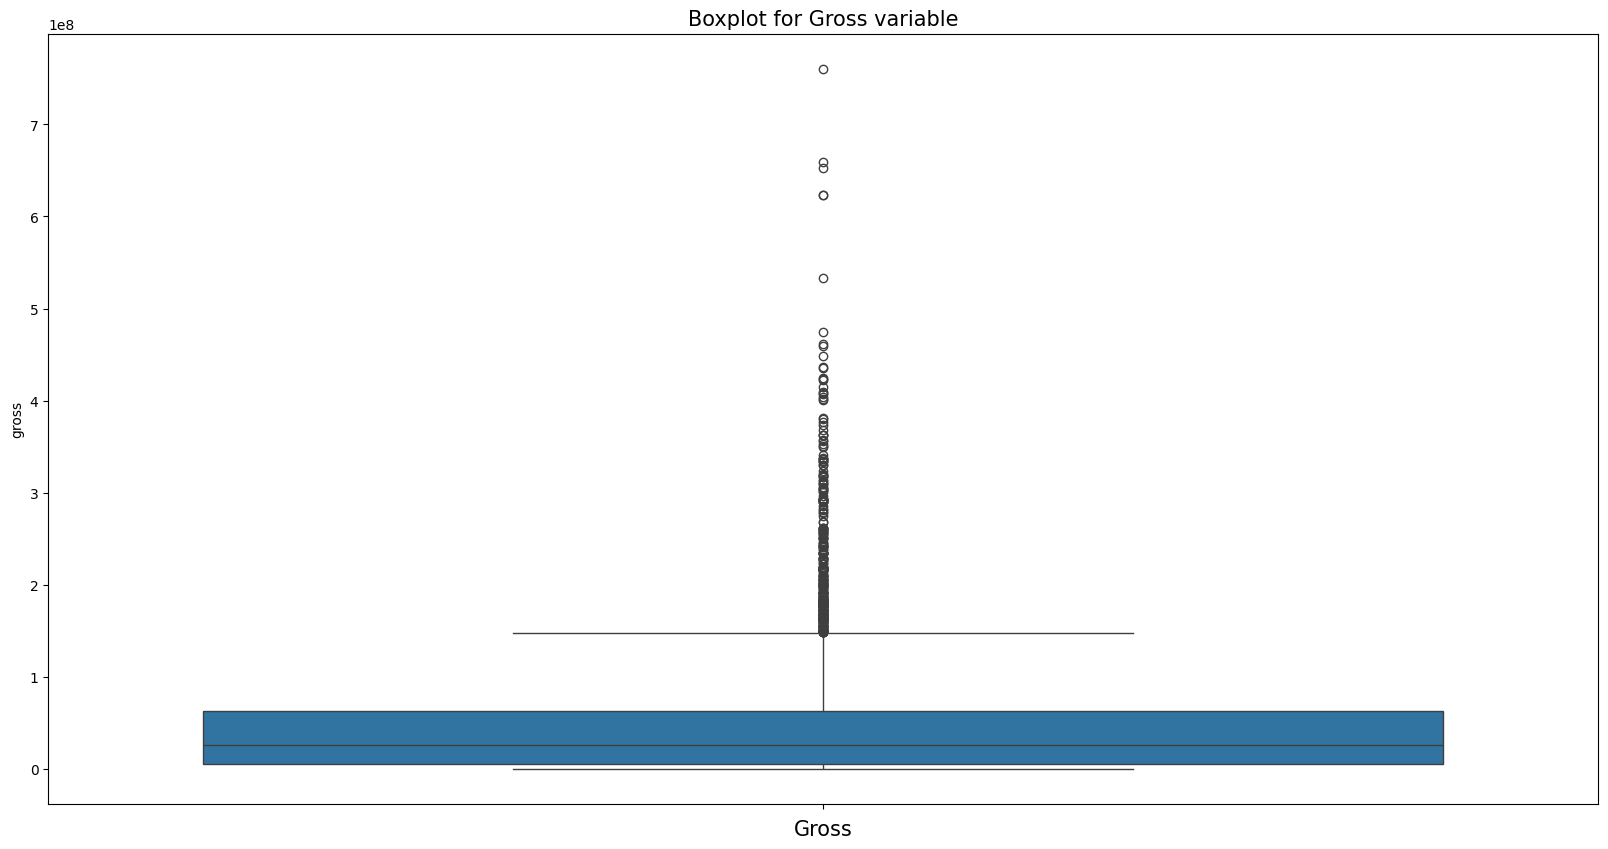

In [14]:
# check outliers in the data
# boxplot matrix for all the numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df['gross'])
plt.xlabel('Gross', fontsize=15)
plt.xticks(rotation=45)
plt.title('Boxplot for Gross variable', fontsize=15)
plt.show();

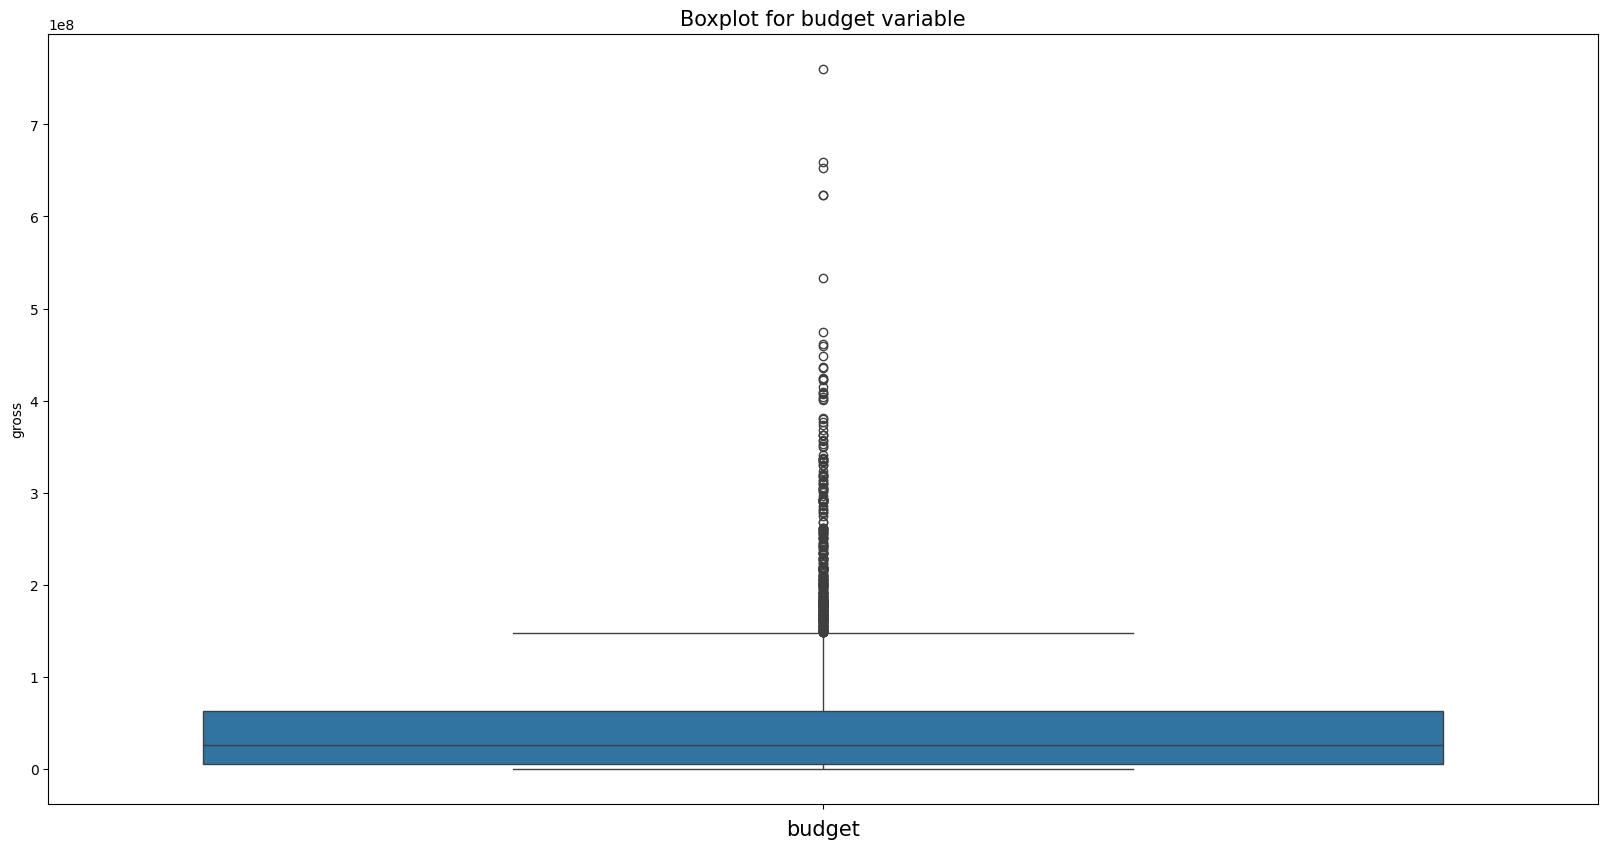

In [15]:
# check outliers in the data
# boxplot matrix for all the numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df['gross'])
plt.xlabel('budget', fontsize=15)
plt.xticks(rotation=45)
plt.title('Boxplot for budget variable', fontsize=15)
plt.show();

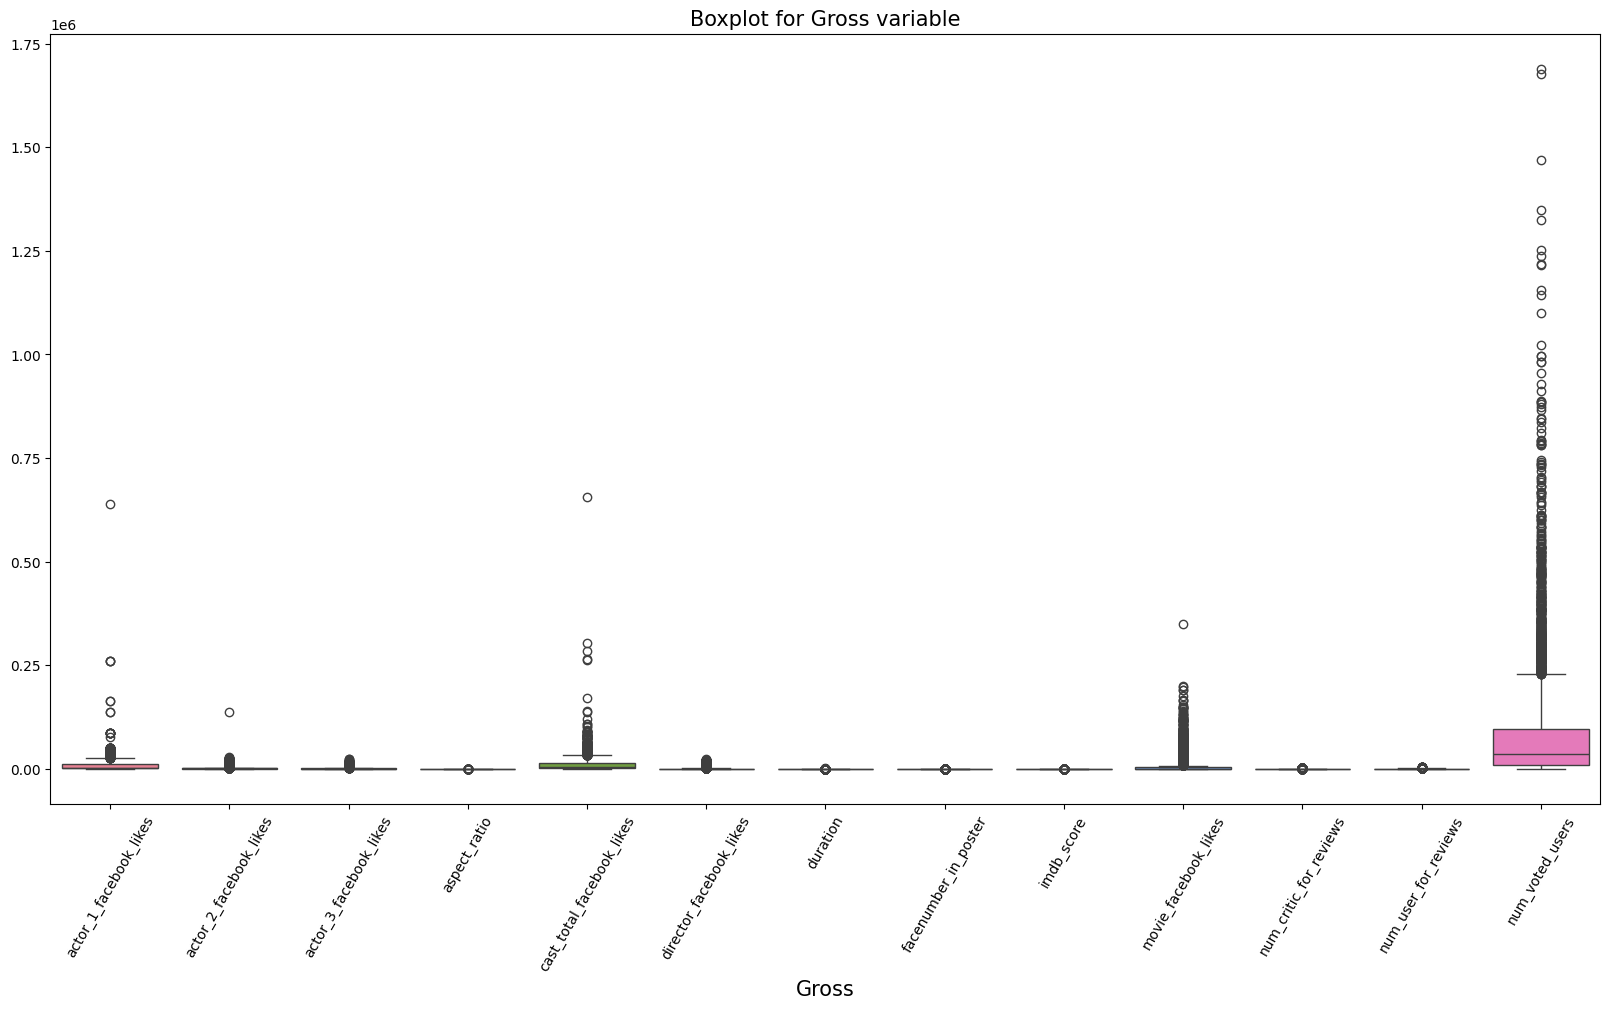

In [16]:
# check outliers in the data
# boxplot matrix for all the other numerical columns
exclude = ['gross', 'budget', 'title_year']
plt.figure(figsize=(20,10))
sns.boxplot(data=df[df.columns.difference(exclude)])
plt.xlabel('Gross', fontsize=15)
plt.xticks(rotation=60)
plt.title('Boxplot for Gross variable', fontsize=15)
plt.show();

There are outliers visible in:
 - `gross`
 - `budget`
 - `num_voted_users`
 - `actor_1_facebook_likes`
 - `cast_total_facebook_likes`

These outliers have a similar trend, and thus do not look like entry typos or merely few extreme observations. They extend with some level of viewable correlations at a glance. No cleaning of outliers will be done, in order to avoid drop originial observations from the data used.

##### Ranges
We use `describe()` function.

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


The numerical variables seem to have a scale that is close, but scaling will further be required in the Modelling stage.

### 2.3 Data Cleaning
Here, we address the issues spotted above.

#### 2.3.1 Cleaning 1: Dropping Un-Used variables

In [18]:
# variables not to use
exclude_vars2 = [
    'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
    'movie_title', 'movie_imdb_link', 'plot_keywords'
]
# drop
df.drop(exclude_vars2, axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_1_facebook_likes     5036 non-null   float64
 6   gross                      4159 non-null   float64
 7   genres                     5043 non-null   object 
 8   num_voted_users            5043 non-null   int64  
 9   cast_total_facebook_likes  5043 non-null   int64  
 10  facenumber_in_poster       5030 non-null   float64
 11  num_user_for_reviews       5022 non-null   float64
 12  language                   5029 non-null   object 
 13  country                    5038 non-null   objec

#### 2.3.1 Cleaning 2: Categorical Variables
We condense the so many observations per variable categories. Ones with few observations will be set to other.

In [20]:
# language
# Updating the existing 'language' column directly to only have 'English' or 'Other'
df['language'] = df['language'].apply(lambda x: 'English' if x == 'English' else 'Other')
print(df['language'].value_counts())


language
English    4704
Other       339
Name: count, dtype: int64


In [21]:
# Country
df['country'] = df['country'].apply(lambda x: 'USA' if x == 'USA' else 'Other')
print(df['country'].value_counts())

country
USA      3807
Other    1236
Name: count, dtype: int64


In [22]:
def map_content_rating(rating):
    if rating in ['R', 'PG-13', 'PG', 'G']:
        return rating
    elif rating in ['TV-MA', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']:
        return 'TV'
    elif rating in ['Approved', 'Passed', 'GP', 'M', 'Not Rated', 'Unrated']:
        return 'Other'
    elif rating in ['X', 'NC-17']:
        return 'Adult'
    else:
        return 'Other'

# Applying the mapping function to the 'content_rating' column
df['content_rating'] = df['content_rating'].apply(map_content_rating)

# Checking the updated value counts to verify changes
print(df['content_rating'].value_counts())


content_rating
R        2118
PG-13    1461
PG        701
Other     556
G         112
TV         75
Adult      20
Name: count, dtype: int64


In [23]:
# categy count
for var in obj_var:
    print(df[var].value_counts(), '\n')

color
Color               4815
 Black and White     209
Name: count, dtype: int64 

language
English    4704
Other       339
Name: count, dtype: int64 

country
USA      3807
Other    1236
Name: count, dtype: int64 

content_rating
R        2118
PG-13    1461
PG        701
Other     556
G         112
TV         75
Adult      20
Name: count, dtype: int64 



In [24]:
df['genres'].value_counts()

genres
Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Crime|Drama|Mystery|Sci-Fi|Thriller             1
Adventure|Comedy|Crime|Drama                    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Comedy|Crime|Horror                             1
Name: count, Length: 914, dtype: int64

In [25]:
# Splitting the genre strings to retain only the first genre
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])


In [26]:
df['genres'].value_counts()


genres
Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
Film-Noir         1
History           1
Name: count, dtype: int64

In [27]:
# Set a threshold for grouping less common genres
threshold = 100

# function to label the genres
def group_genres(genre, counts, threshold):
    if counts[genre] < threshold:
        return 'Other'
    return genre
genre_counts = df['genres'].value_counts()
df['genres'] = df['genres'].apply(lambda x: group_genres(x, genre_counts, threshold))

In [28]:
df['genres'].value_counts()

genres
Comedy       1329
Action       1153
Drama         972
Adventure     453
Crime         349
Other         303
Biography     252
Horror        232
Name: count, dtype: int64

#### 2.3.3 Cleaning 3: Imputing Missing Observations

In [29]:
df.isna().sum()

color                         19
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
language                       0
country                        0
content_rating                 0
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

# Continuous variables with missing values
continuous_vars = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'budget', 'gross',
                   'facenumber_in_poster', 'num_user_for_reviews', 'aspect_ratio']

# Imputer for filling missing values with median
imputer = SimpleImputer(strategy='median')
df[continuous_vars] = imputer.fit_transform(df[continuous_vars])


In [31]:
# Impute 'color' using the mode
df['color'].fillna(df['color'].mode()[0], inplace=True)

# Impute 'actor_3_facebook_likes' using the median as it's numerical
df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median(), inplace=True)
df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].median(), inplace=True)
df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].median(), inplace=True)

In [32]:
df['title_year'].fillna(df['title_year'].median(), inplace=True)

In [33]:
df.isna().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

The data is clean now.

## 3. Exploratory Data Analysis
### 3.1 Univariate Analysis

#### Summary Statistics

In [34]:
# SUmmary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,5043.0,1.398949e+02,1.210342e+02,1.00,50.00,110.00,194.00,8.130000e+02
duration,5043.0,1.071886e+02,2.516097e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,5043.0,6.733621e+02,2.785637e+03,0.00,7.00,49.00,189.00,2.300000e+04
actor_3_facebook_likes,5043.0,6.437623e+02,1.661342e+03,0.00,134.50,371.50,635.00,2.300000e+04
actor_1_facebook_likes,5043.0,6.552313e+03,1.501176e+04,0.00,615.50,988.00,11000.00,6.400000e+05
gross,5043.0,4.444529e+07,6.277281e+07,162.00,8460992.50,25517500.00,51357065.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5043.0,1.370216e+00,2.011066e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5043.0,2.722846e+02,3.772699e+02,1.00,65.00,156.00,324.00,5.060000e+03


#### Count plot

In [35]:
obj_var = ['color', 'language', 'country', 'content_rating', 'genres']

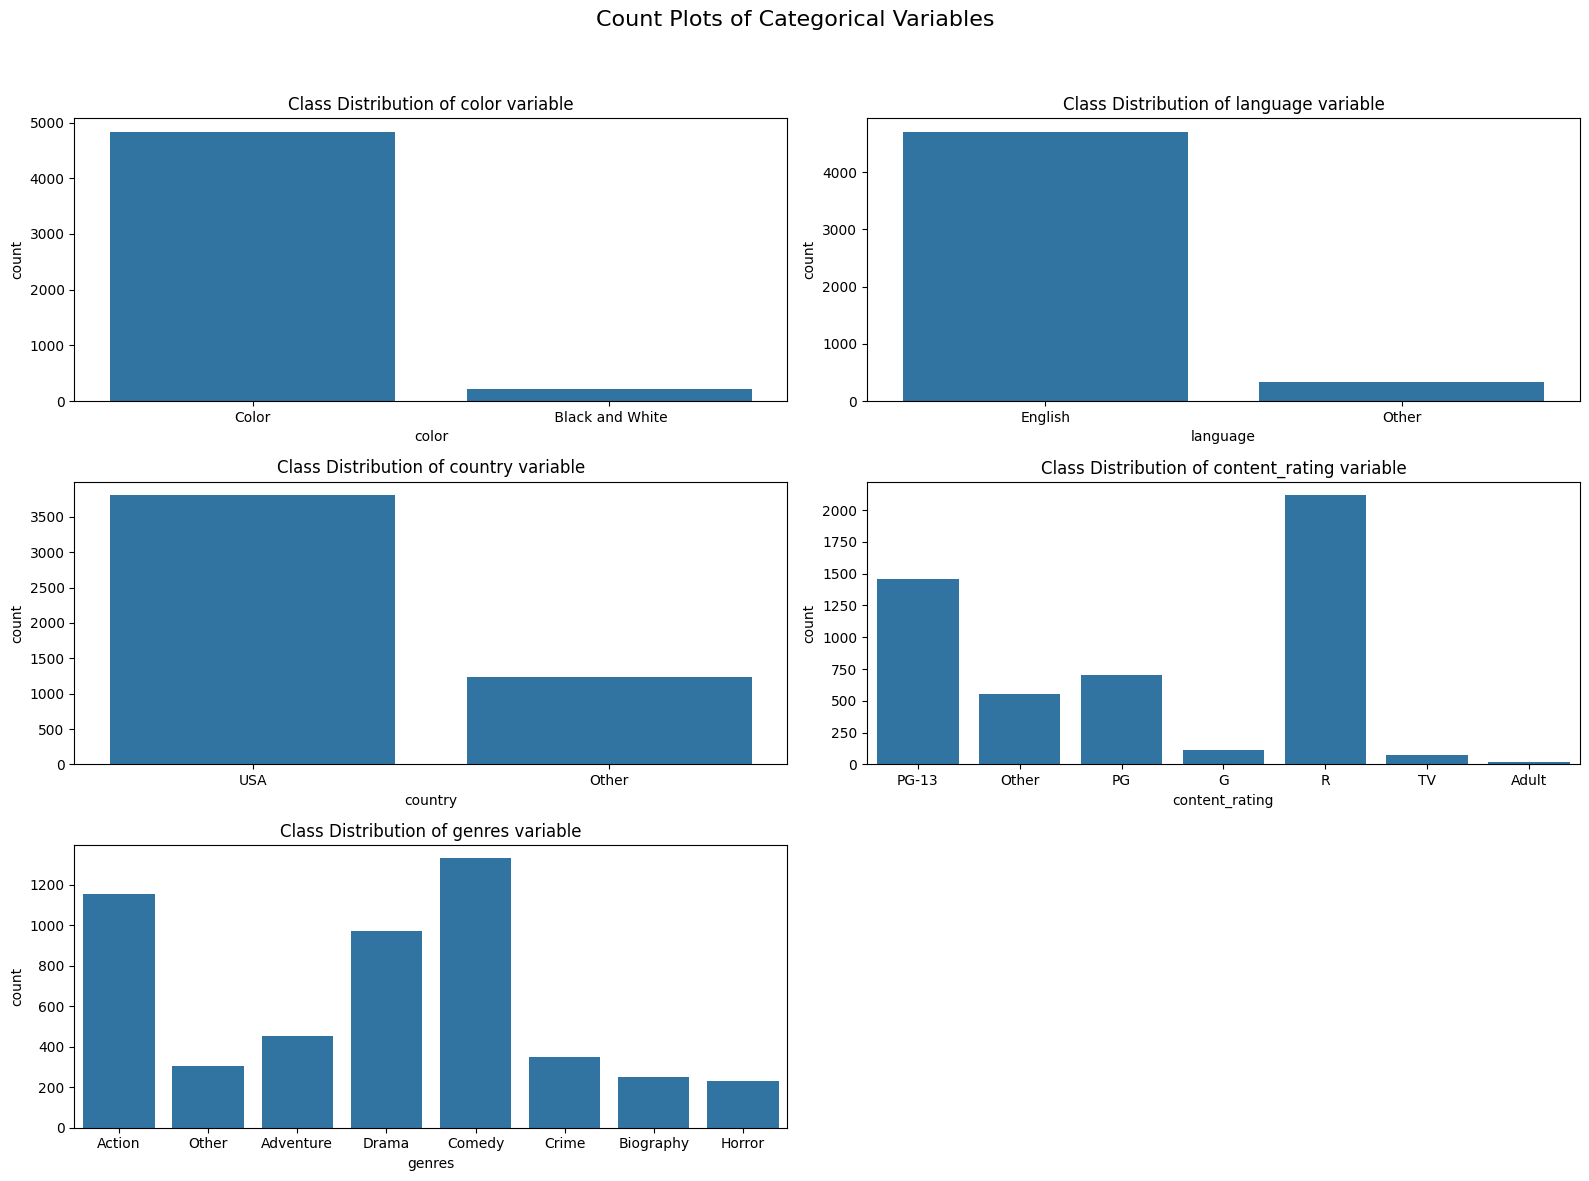

In [36]:
num_vars = len(obj_var)
num_cols = 2  # columns in the subplot grid
num_rows = (num_vars + num_cols - 1) // num_cols  #  rows required

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))
fig.suptitle('Count Plots of Categorical Variables', fontsize=16)
axs = axs.flatten()
for i, var in enumerate(obj_var):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(f'Class Distribution of {var} variable')
    axs[i].tick_params(axis='x')
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Histograms

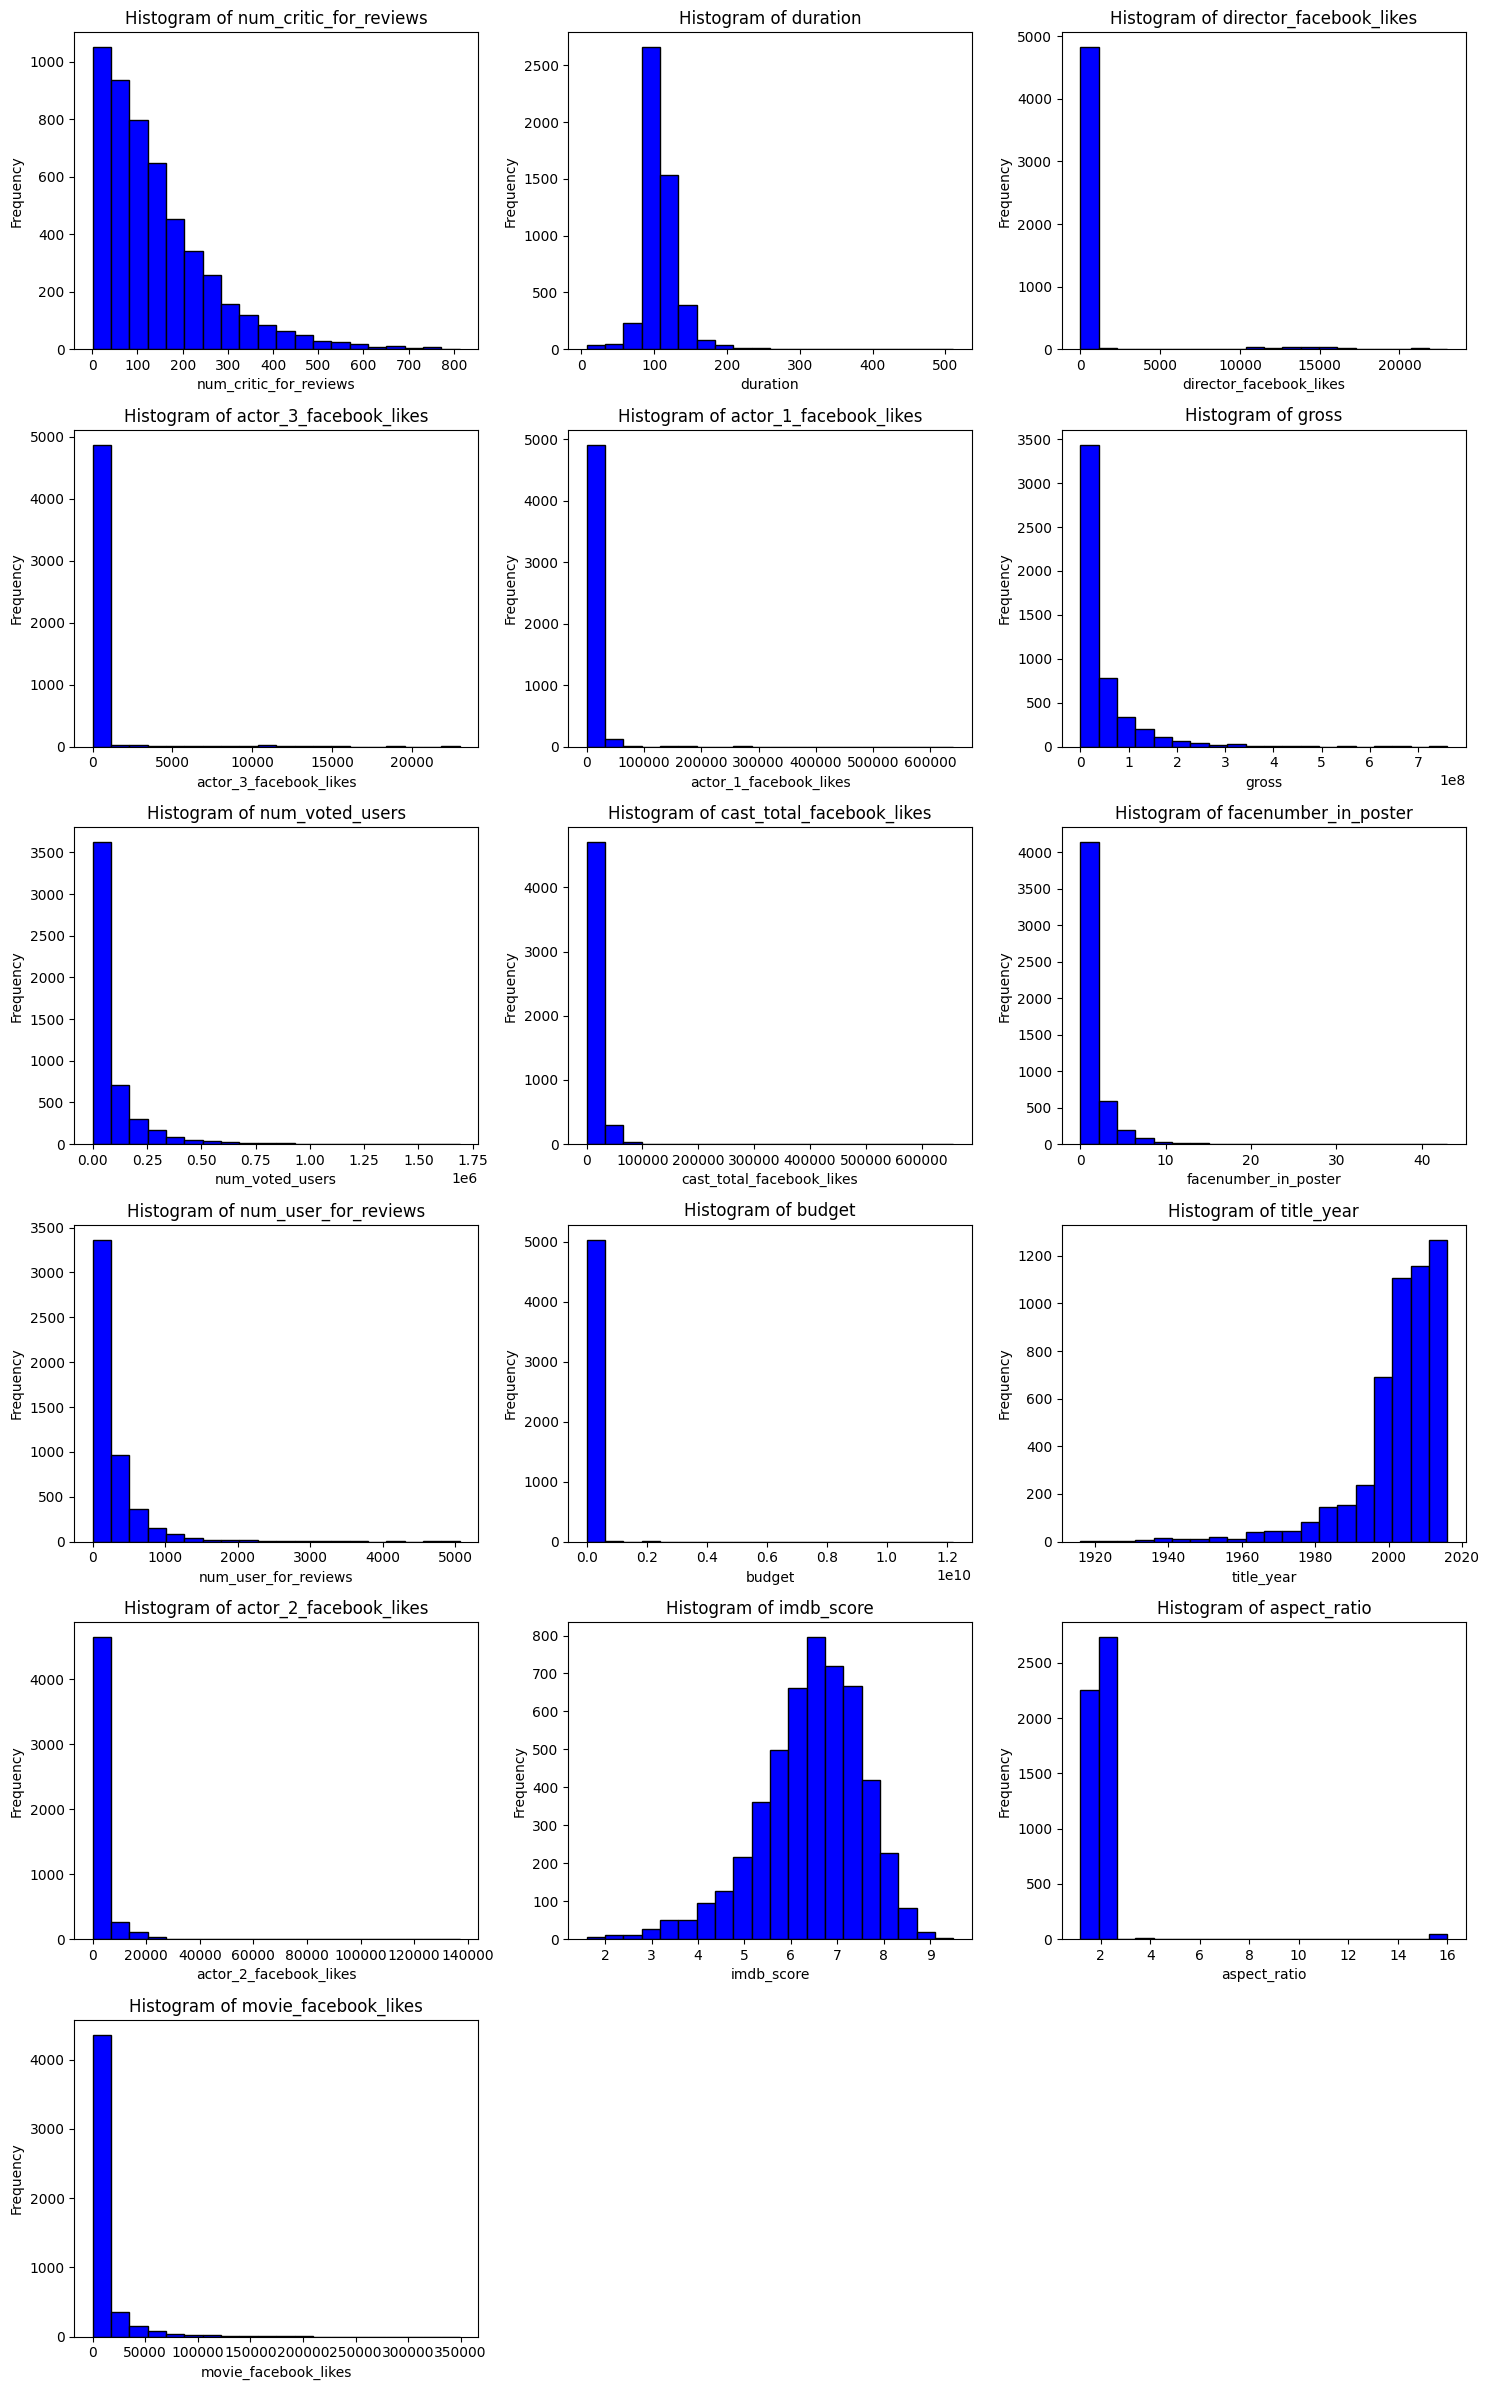

In [37]:
# histogram
# subplot, with only one column, for all variables
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


#### Boxplots

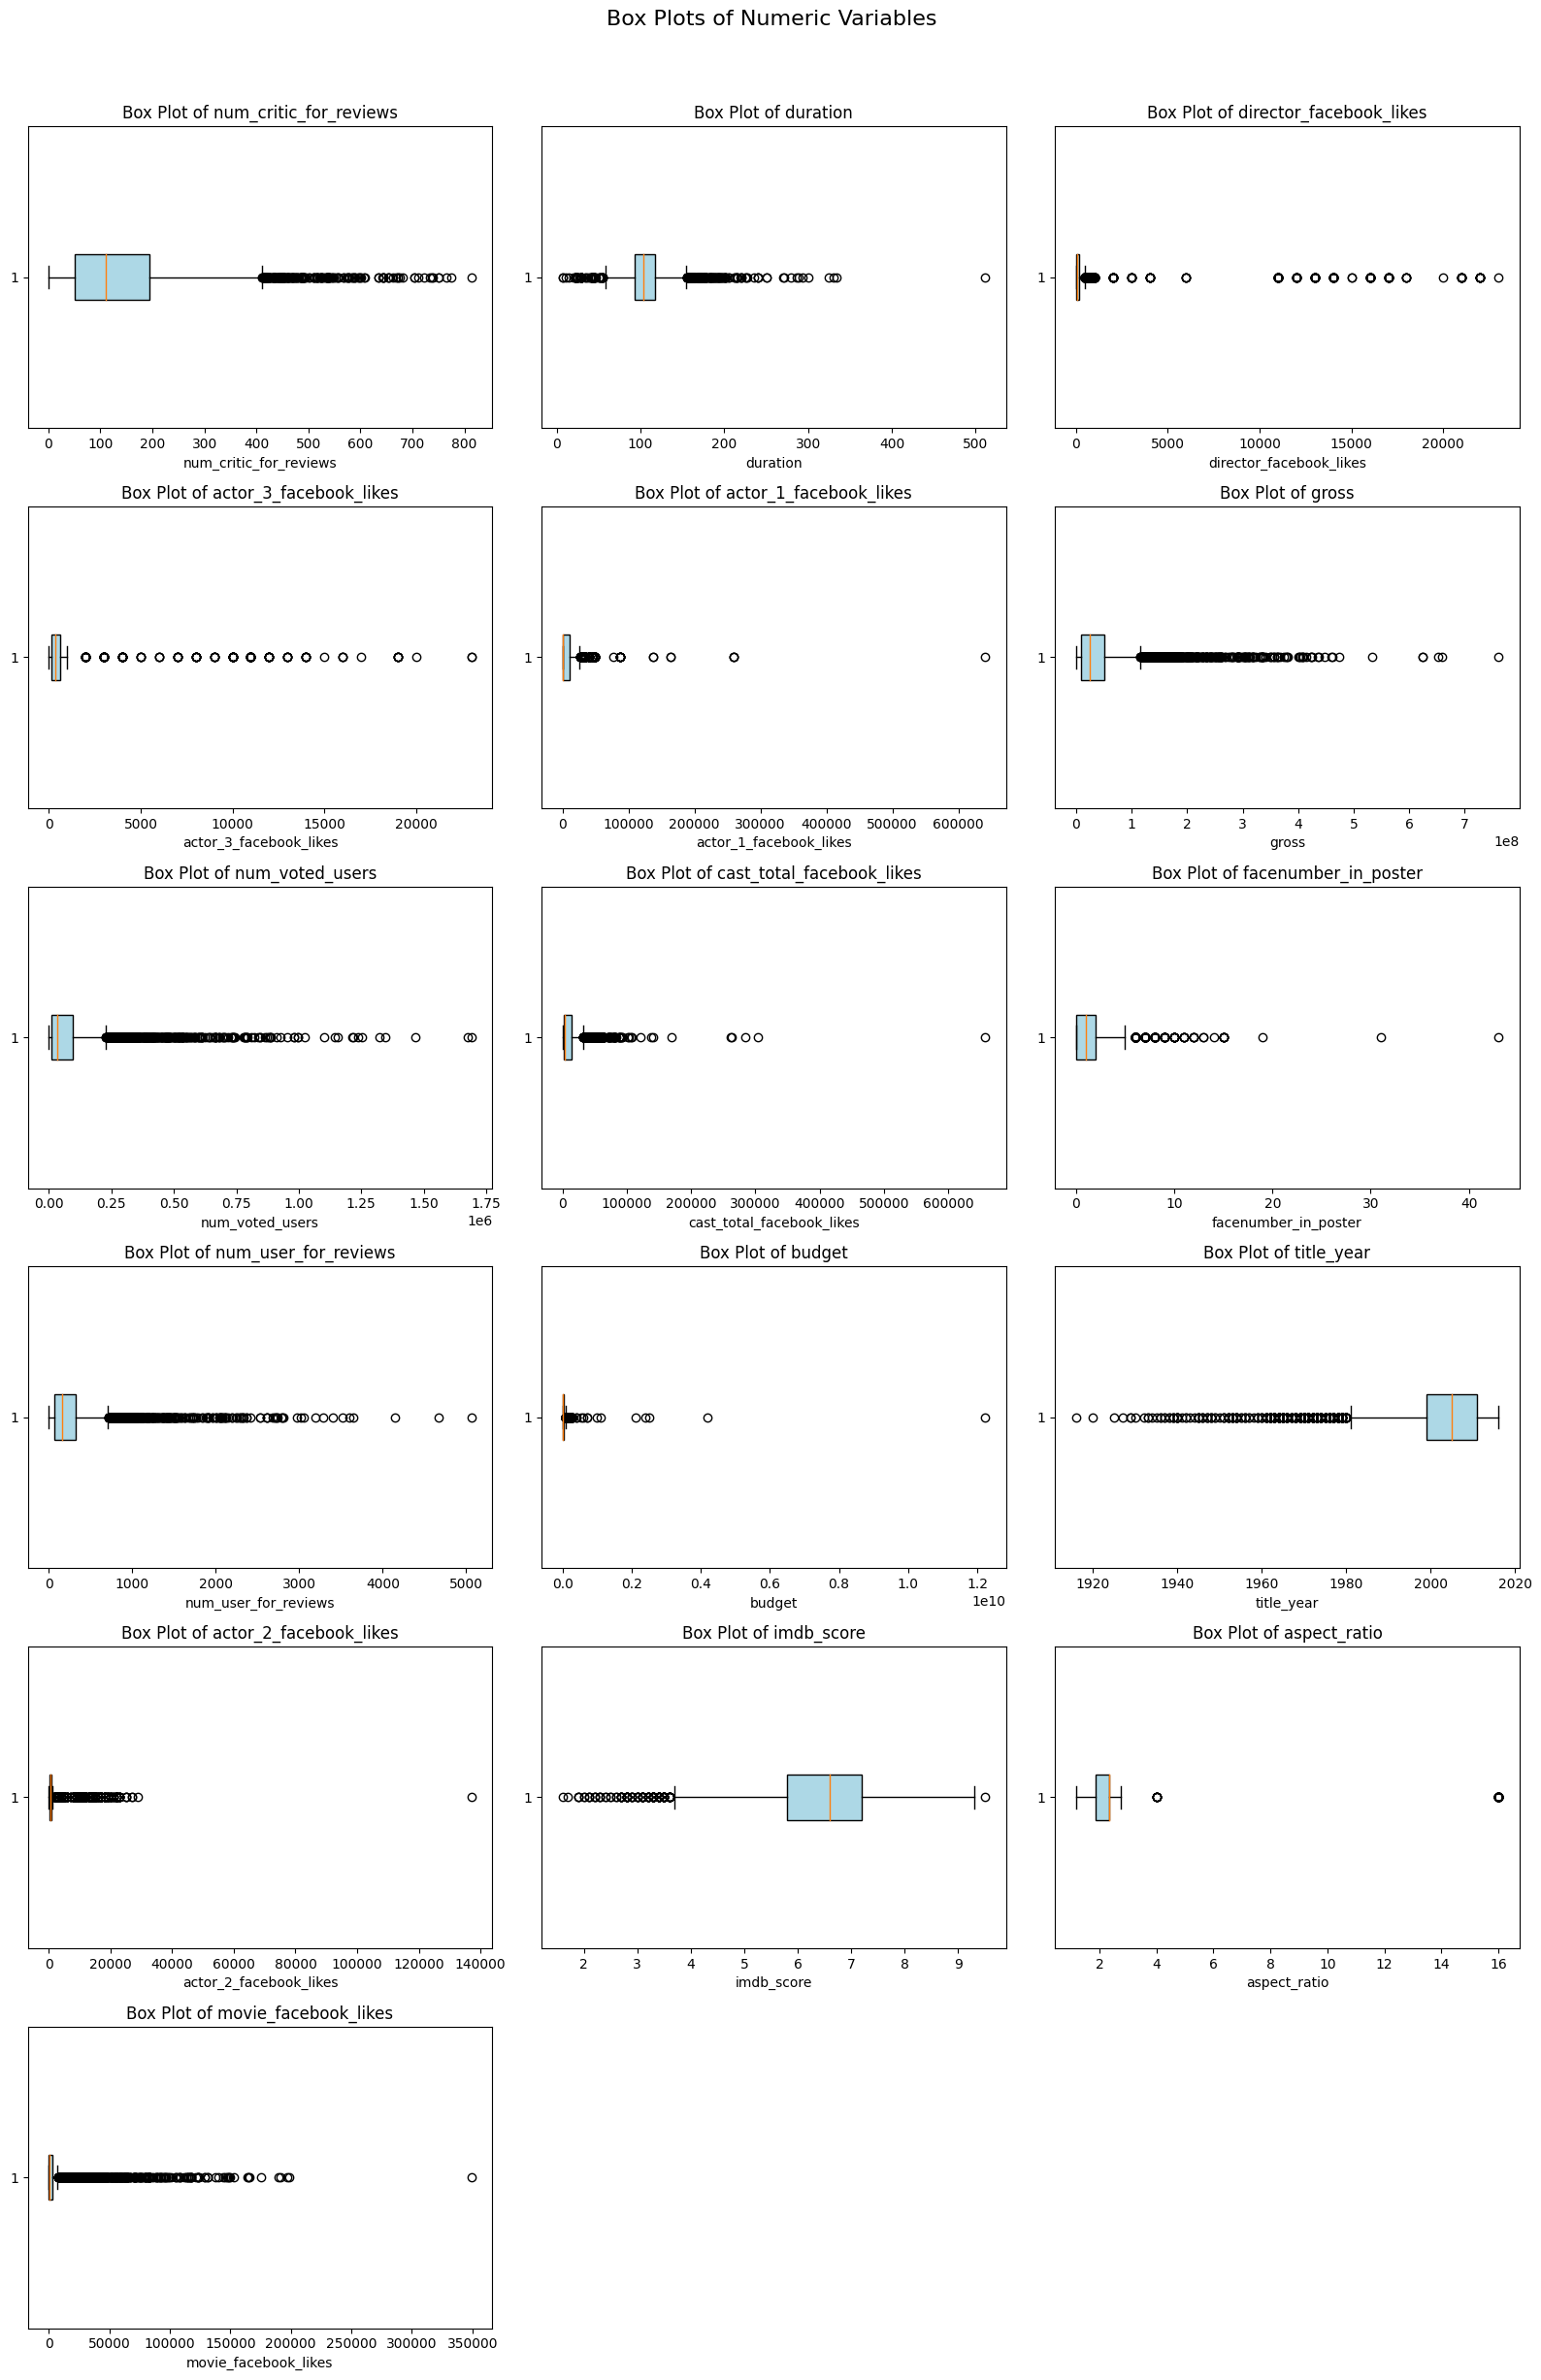

In [38]:
# List of numeric columns in your DataFrame
numeric_columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                   'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
                   'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
                   'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
                   'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

# Number of columns per row in the grid
cols = 3
# Number of rows needed
rows = (len(numeric_columns) + cols - 1) // cols

# Create a grid of subplots
fig, axs = plt.subplots(rows, cols, figsize=(16, rows * 4))
fig.suptitle('Box Plots of Numeric Variables', fontsize=16, y=1.02)

# Flatten the axs array in case the grid is more than 1 row
axs = axs.flatten()

# Generate each box plot
for index, column in enumerate(numeric_columns):
    axs[index].boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axs[index].set_title(f'Box Plot of {column}')
    axs[index].set_xlabel(column)

# Remove any unused subplots
for i in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

#### Density Plot

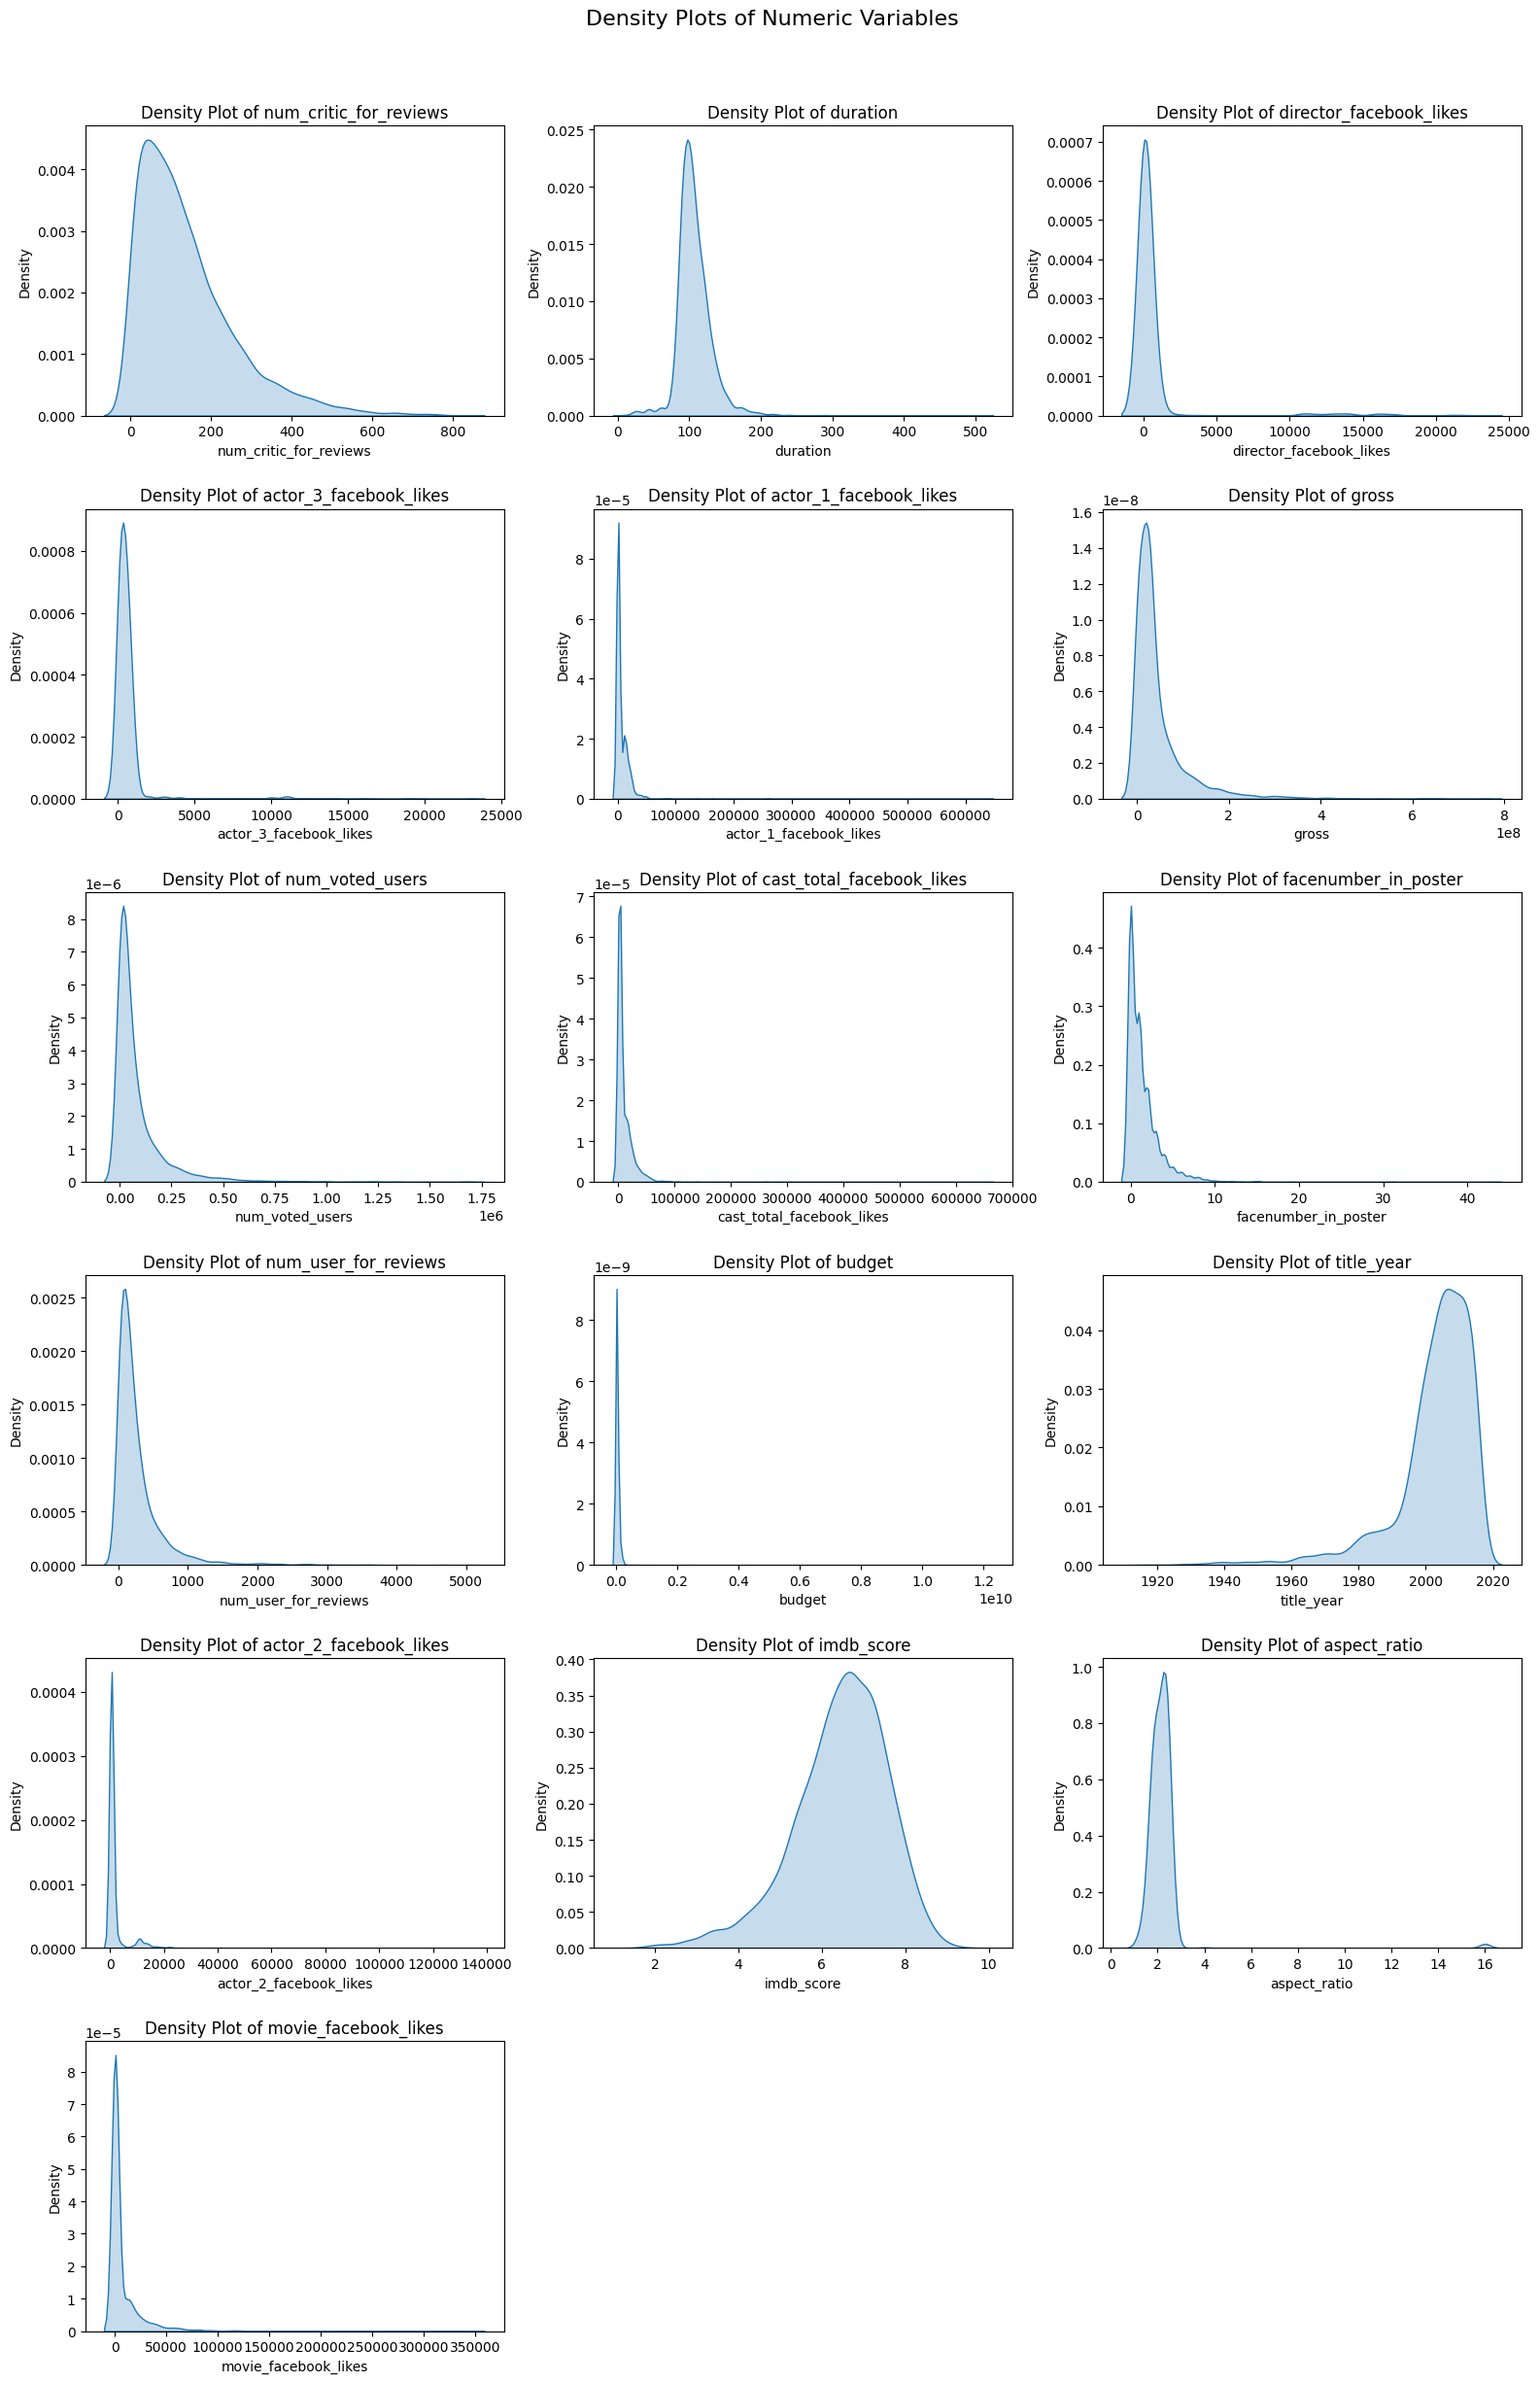

In [39]:
cols = 3
rows = (len(numeric_columns) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(16, rows * 4))
fig.suptitle('Density Plots of Numeric Variables', fontsize=16, y=1.02)
axs = axs.flatten()

for index, column in enumerate(numeric_columns):
    sns.kdeplot(df[column].dropna(), shade=True, ax=axs[index])
    axs[index].set_title(f'Density Plot of {column}')
    axs[index].set_xlabel(column)
    axs[index].set_ylabel('Density')
for i in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


### 3.2 Bivariate Analysis

#### Scatter plot

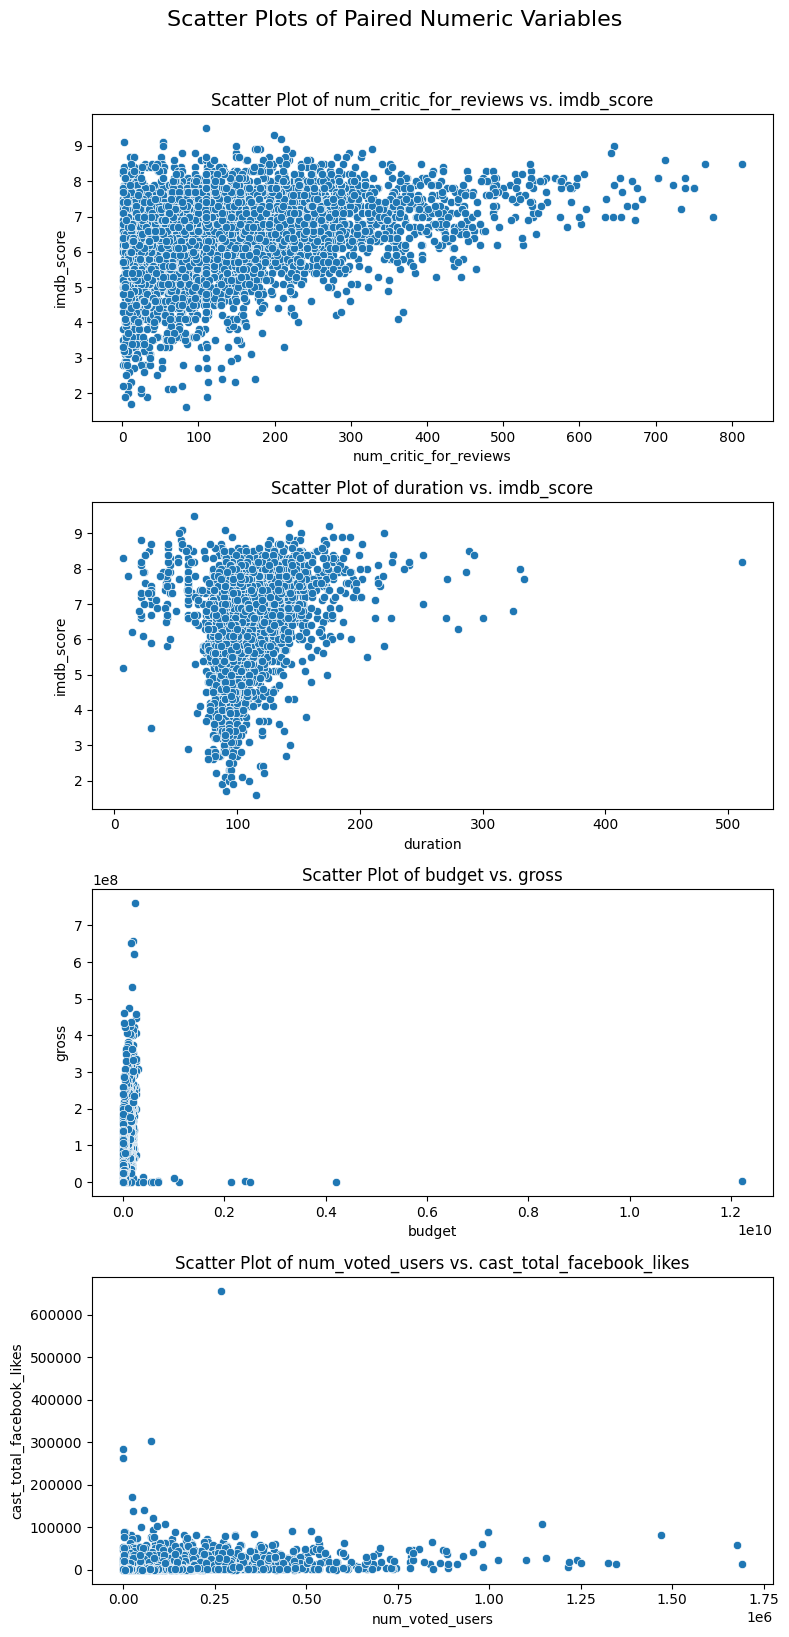

In [40]:
pairs = [('num_critic_for_reviews', 'imdb_score'),
         ('duration', 'imdb_score'),
         ('budget', 'gross'),
         ('num_voted_users', 'cast_total_facebook_likes')]

# Create a grid of subplots
fig, axs = plt.subplots(len(pairs), 1, figsize=(8, len(pairs) * 4))
fig.suptitle('Scatter Plots of Paired Numeric Variables', fontsize=16, y=1.02)

# Create scatter plots for each pair
for index, (x, y) in enumerate(pairs):
    sns.scatterplot(x=df[x], y=df[y], ax=axs[index])
    axs[index].set_title(f'Scatter Plot of {x} vs. {y}')
    axs[index].set_xlabel(x)
    axs[index].set_ylabel(y)

plt.tight_layout()
plt.show()


#### Pair Plot (All Numeric Variables)

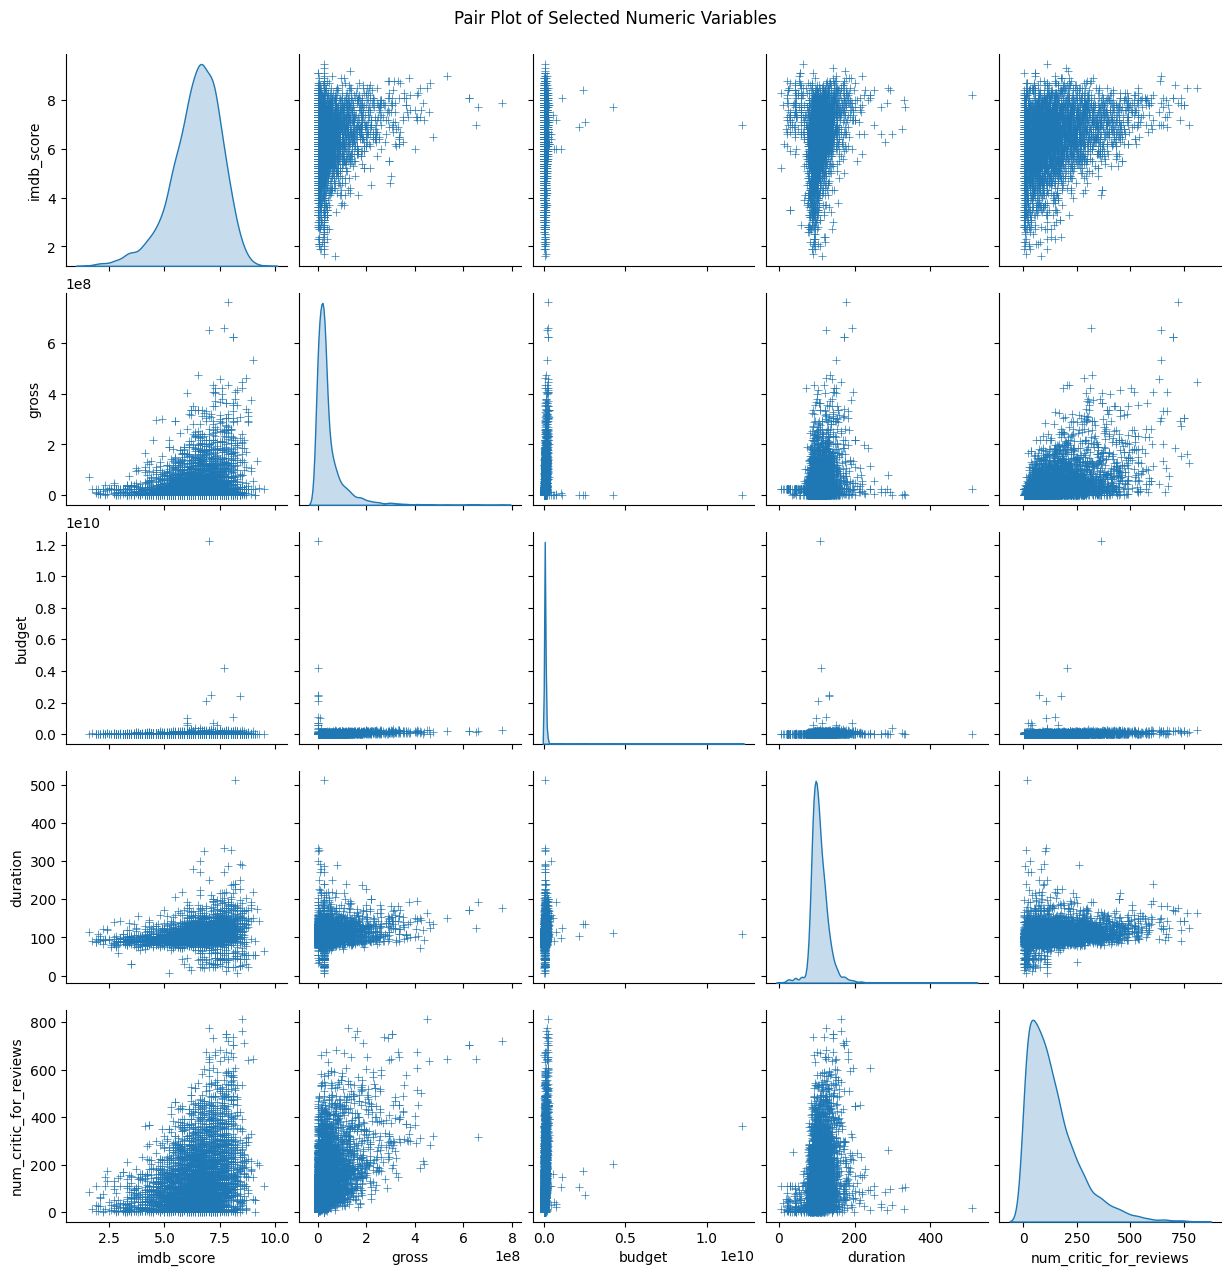

In [41]:
# Pair plot for selected numeric variables
selected_numeric_columns = ['imdb_score', 'gross', 'budget', 'duration', 'num_critic_for_reviews']
sns.pairplot(df[selected_numeric_columns], diag_kind='kde', markers='+')
plt.suptitle('Pair Plot of Selected Numeric Variables', y=1.02)
plt.show()

#### Heatmap (Categorical vs. Categorical or Mixed)

In [42]:
# Heatmap for correlation of numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# round off correlation values to 2 dp
corr = df[num_cols].corr().round(2)
corr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00,0.26,0.18,0.27,0.19,0.49,0.63,0.26,-0.03,0.61,0.12,0.27,0.28,0.30,-0.05,0.68
duration,0.26,1.00,0.16,0.12,0.09,0.23,0.31,0.12,0.01,0.33,0.07,-0.13,0.13,0.26,-0.09,0.20
director_facebook_likes,0.18,0.16,1.00,0.12,0.09,0.15,0.30,0.12,-0.04,0.22,0.02,-0.06,0.12,0.16,-0.02,0.16
actor_3_facebook_likes,0.27,0.12,0.12,1.00,0.25,0.32,0.29,0.47,0.10,0.23,0.05,0.09,0.56,0.05,-0.01,0.28
actor_1_facebook_likes,0.19,0.09,0.09,0.25,1.00,0.16,0.19,0.95,0.07,0.15,0.02,0.08,0.39,0.08,-0.02,0.14
gross,0.49,0.23,0.15,0.32,0.16,1.00,0.64,0.25,-0.03,0.57,0.11,0.04,0.27,0.17,-0.01,0.38
num_voted_users,0.63,0.31,0.30,0.29,0.19,0.64,1.00,0.27,-0.03,0.80,0.08,0.01,0.27,0.41,-0.02,0.54
cast_total_facebook_likes,0.26,0.12,0.12,0.47,0.95,0.25,0.27,1.00,0.09,0.21,0.04,0.11,0.63,0.09,-0.02,0.21
facenumber_in_poster,-0.03,0.01,-0.04,0.10,0.07,-0.03,-0.03,0.09,1.00,-0.07,-0.02,0.06,0.07,-0.06,0.01,0.01
num_user_for_reviews,0.61,0.33,0.22,0.23,0.15,0.57,0.80,0.21,-0.07,1.00,0.09,-0.01,0.22,0.29,-0.03,0.40


#### Bar Plot (Categorical vs. Numerical)

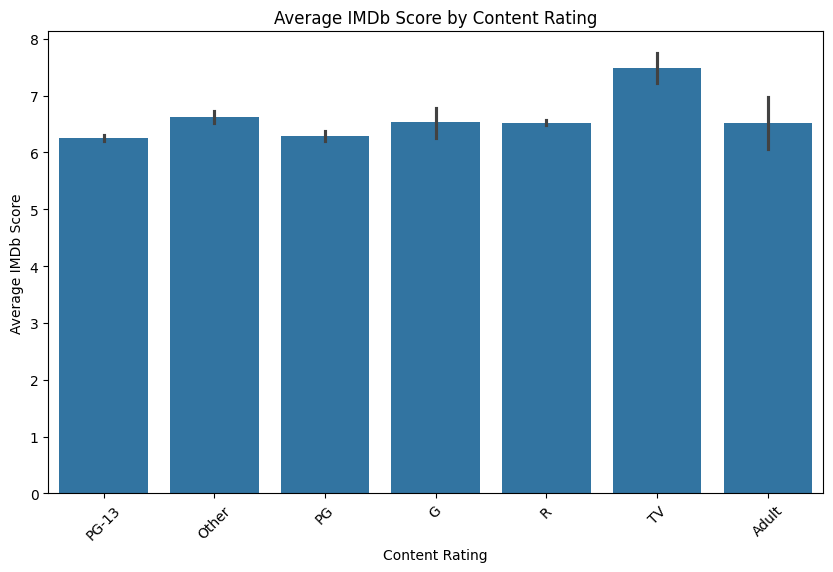

In [43]:
# Bar plot example (e.g., content_rating vs. imdb_score)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='content_rating', y='imdb_score', estimator=np.mean)
plt.title('Average IMDb Score by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()


#### Bar Plot of Genres vs. IMDb Score

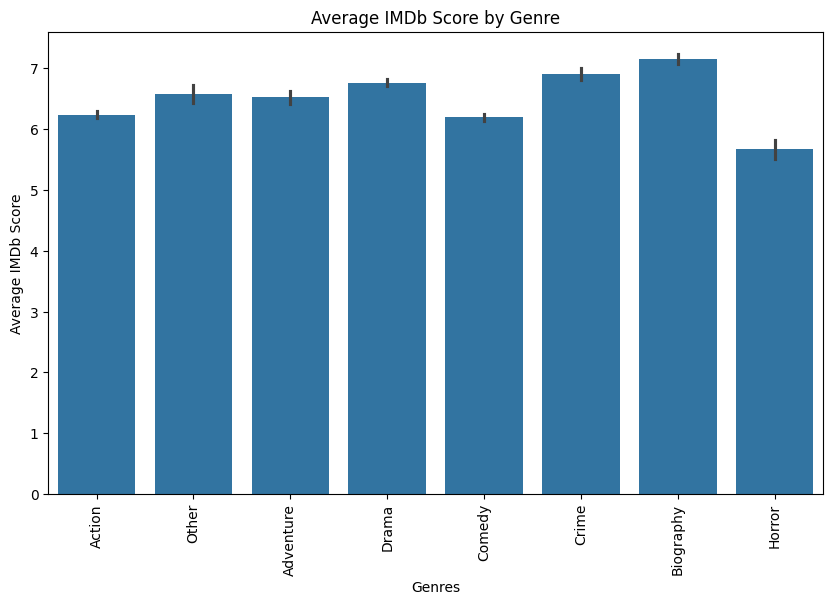

In [44]:
# Bar plot for average IMDb score across different genres
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='genres', y='imdb_score', estimator=np.mean)
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90)
plt.show()


#### Bar Plot 2: Country vs. IMDb Score

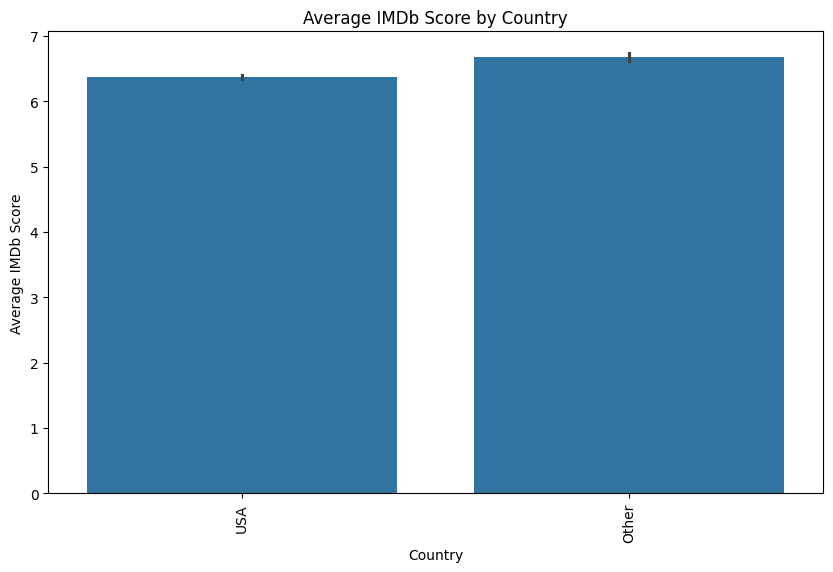

In [45]:
# Bar plot for average IMDb score by country
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country', y='imdb_score', estimator=np.mean)
plt.title('Average IMDb Score by Country')
plt.xlabel('Country')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90)
plt.show()


### 3.3 Advanced Visualizations

In [46]:
df.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### Scatter Plot with Regression Line

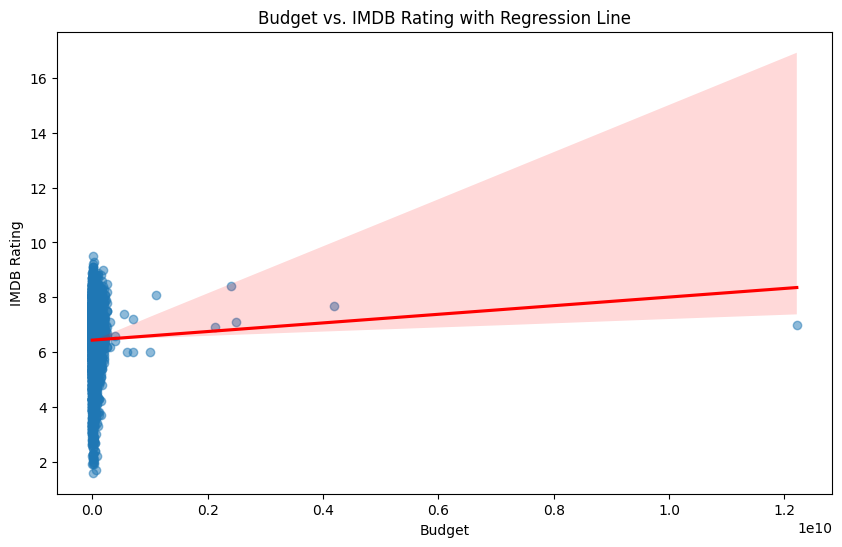

In [47]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='imdb_score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Budget vs. IMDB Rating with Regression Line')
plt.xlabel('Budget')
plt.ylabel('IMDB Rating')
plt.show()


#### Violin Plot

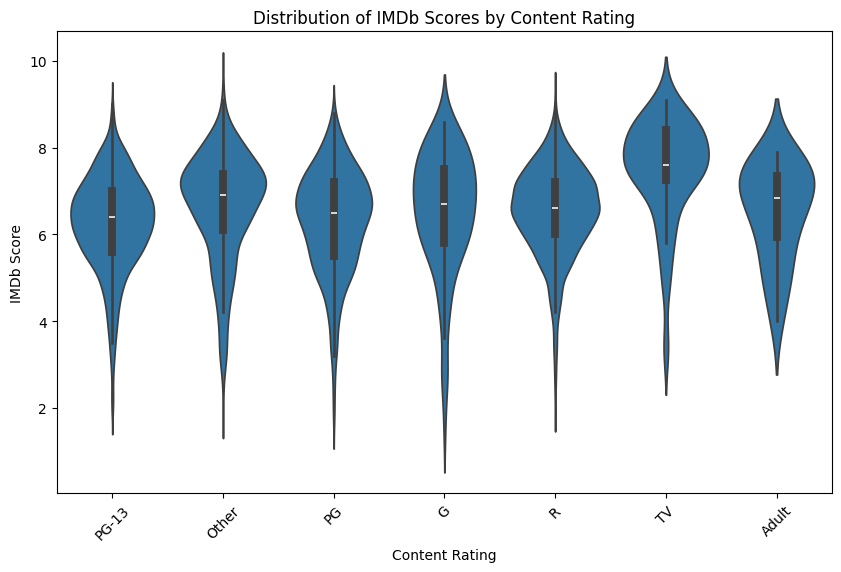

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='content_rating', y='imdb_score', data=df)
plt.title('Distribution of IMDb Scores by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()


#### Stacked Bar Plot

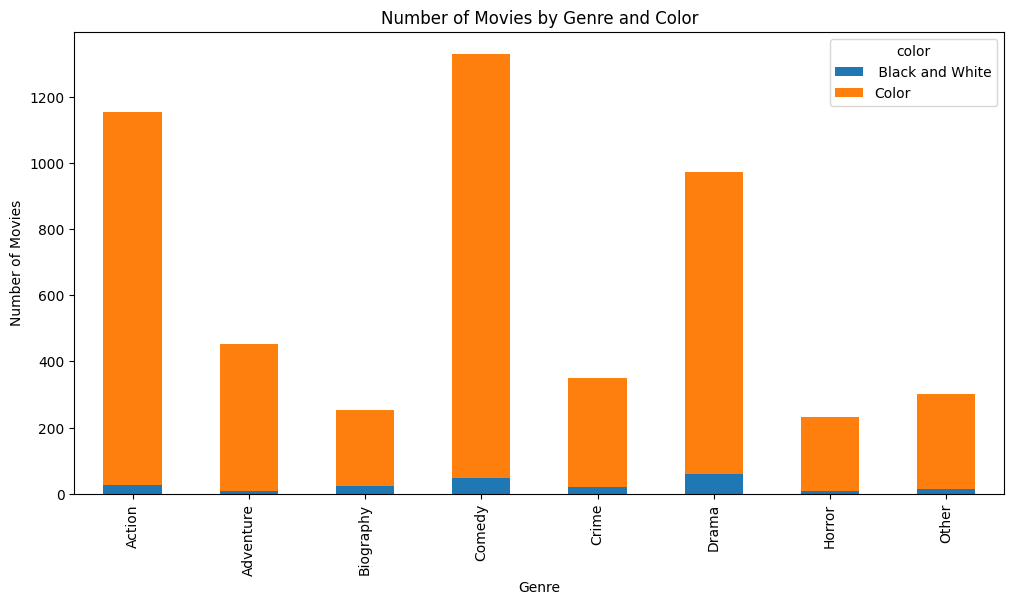

In [49]:
stacked_data = df.groupby(['genres', 'color']).size().unstack().fillna(0)

# Stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Movies by Genre and Color')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


#### Scatter Plot with Color Coding by a Third Variable

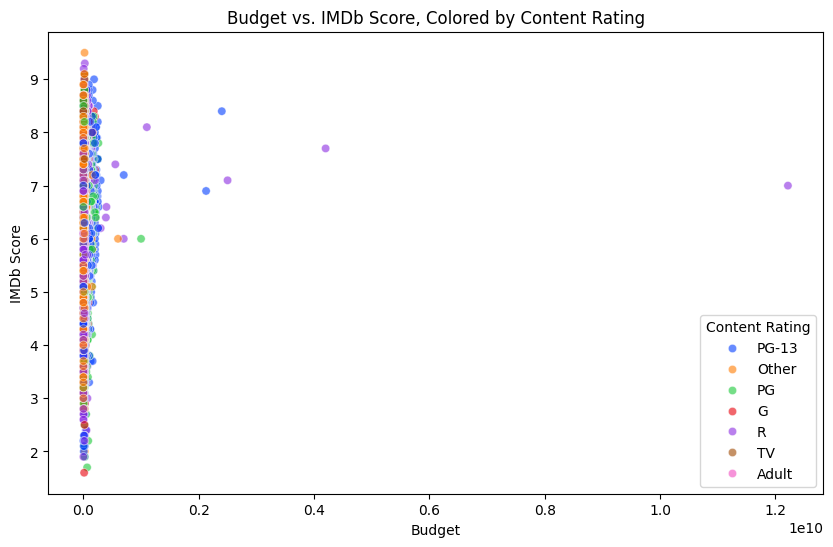

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='imdb_score', hue='content_rating', data=df, palette='bright', alpha=0.6)
plt.title('Budget vs. IMDb Score, Colored by Content Rating')
plt.xlabel('Budget')
plt.ylabel('IMDb Score')
plt.legend(title='Content Rating')
plt.show()


### 3.3 Summary of EDA
Based on the comprehensive data analyzed, here's a summary that show the findings from our descriptive and visual statistics:

1. **Descriptive Statistics Overview:**
   - The dataset provides detailed numerical insights into various aspects of movie characteristics. Key variables such as `num_critic_for_reviews`, `duration`, and `gross` show a wide range of values, indicating diversity in movie popularity and production scales.
   - The average `imdb_score` is approximately 6.44, suggesting a moderate level of general approval across movies.
   - Variables like `budget` and `gross` have high standard deviations, reflecting significant disparities in movie budgets and earnings.

2. **Variable Relationships and Distributions:**
   - The number of critic reviews (`num_critic_for_reviews`) and the number of votes (`num_voted_users`) are highly correlated with `imdb_score`, indicating that more reviewed and voted movies tend to have higher ratings.
   - The `duration` of movies shows a moderate correlation with the `imdb_score`, suggesting that longer movies might be associated with higher quality as perceived by audiences.
   - The visualization of budget vs. gross earnings reveals that while there are many low-budget films, high-budget films generally tend to earn significantly more, showcasing the risk-reward nature of movie production.

3. **Categorical Variable Insights:**
   - The analysis of categorical variables like `genres` and `content_rating` using count and bar plots reveals popular trends and their impact on ratings. For instance, Drama, Comedy, and Action are prevalent genres, which vary in their average IMDb scores.
   - Content ratings such as R and PG-13 dominate the dataset, with R-rated movies generally receiving higher average IMDb scores, which might suggest a more mature or critically acclaimed content type resonates better with audiences.

4. **Advanced Visualizations:**
   - Scatter plots with regression lines between budget and gross underscore a positive correlation, suggesting that generally, higher investments can lead to higher returns.
   - Violin plots for `imdb_score` across different content ratings provide insights into the distribution of movie ratings, showing that genres and content ratings significantly influence viewer perceptions and critic ratings.
   - Stacked bar plots highlight the distribution of movies by color across genres, showing a predominance of color films in all categories, with Black and White films being relatively rare and focused in specific genres like Drama.

This summary underscores the utility of combining descriptive statistics with advanced visual analytics to understand complex relationships and trends within the movie industry, helping stakeholders make informed decisions based on data-driven insights.

## 4. Model Development
### 4.1 Model Selection
For the predictive analysis of the `imdb_score` variable, which we have decided to convert into a categorical variable with three classes, the selection of Decision Trees, Random Forest, and Naive Bayes models is strategic and driven by specific attributes and strengths of these models:

1. **Decision Tree:**
   - **Interpretability:** Decision Trees are highly interpretable, making it easy to understand how decisions are being made, which is crucial for transparency in model reasoning.
   - **Non-linear Relationships:** They can handle non-linear relationships between features effectively, which might be the case in a dataset with diverse movie characteristics.
   - **Handling Categorical Data:** They inherently manage categorical data, making them a good fit for your transformed `imdb_score`.

2. **Random Forest:**
   - **Accuracy:** Random Forests generally provide a higher level of accuracy than a single decision tree by averaging multiple trees to reduce variance and overfitting.
   - **Feature Importance:** This model provides insights into feature importance, which can be critical in understanding what factors most influence `imdb_score`.
   - **Robustness:** It is less likely to overfit than a single decision tree and is robust against outliers and noise, which are likely in complex datasets like movies.

3. **Naive Bayes:**
   - **Probabilistic Approach:** Naive Bayes calculates the probability of each class and the conditional probability of each class given each input variable. This is useful in classification problems with well-defined binary or categorical output variables.
   - **Efficiency:** It is highly scalable, requiring a small amount of training data to estimate the necessary parameters.
   - **Baseline Model:** Naive Bayes is often used as a baseline for classification because of its simplicity and speed.



### Creating Three Classes for `imdb_score`:

Given the continuous nature of the `imdb_score`, transforming it into three categorical classes can simplify the problem into a manageable form, focusing on classifying movies into low, medium, or high ratings. Here is how we define these classes based on score ranges:

- **Class 1 - Low:** Scores from the minimum up to one standard deviation below the mean.
- **Class 2 - Medium:** Scores from one standard deviation below the mean to one standard deviation above the mean.
- **Class 3 - High:** Scores from one standard deviation above the mean to the maximum.


In [51]:
# cutoffs based on standard deviation and mean
mean_score = df['imdb_score'].mean()
std_dev = df['imdb_score'].std()
low_cutoff = mean_score - std_dev
high_cutoff = mean_score + std_dev

# categorize scores
def categorize_score(score):
    if score < low_cutoff:
        return 'Low'
    elif score < high_cutoff:
        return 'Medium'
    else:
        return 'High'

# Apply function to create a new categorical score variable
df['imdb_score'] = df['imdb_score'].apply(categorize_score)

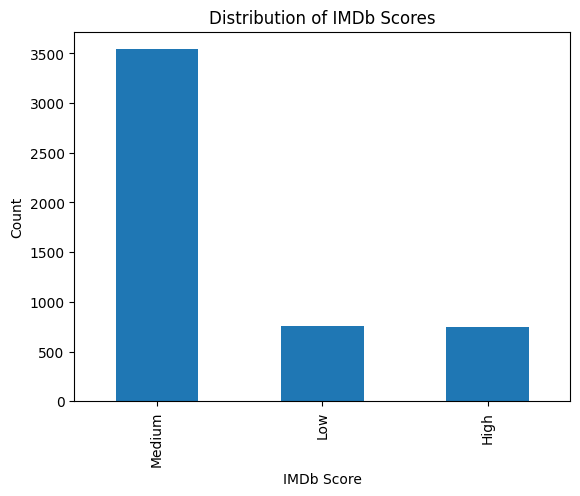

In [52]:
df['imdb_score'].value_counts().plot(kind='bar')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show();


This classification scheme and model selection strategy should ideally position your analysis for actionable insights, balancing interpretability with predictive accuracy.

### 4.2 Model Fitting and Validation
The following procedures will be done:
> - Variable encoding
> - Splitting and sampling dataset
> - Training Models
> - Performance evaluation of models
> - Selecting and Testing the Best model

#### 4.2.1 Preprocessing

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
# One-hot encode categorical variables
categorical_features = ['color', 'language', 'country', 'content_rating', 'genres']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Label encode the target variable
label_encoder = LabelEncoder()
df['imdb_score'] = label_encoder.fit_transform(df['imdb_score'])

In [55]:
# Prepare features and target
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 4.2.2 Training Models

In [56]:
# Define pipelines for each model
decision_tree_model = Pipeline([("transformer", transformer), ("dt", DecisionTreeClassifier(random_state=42))])
random_forest_model = Pipeline([("transformer", transformer), ("rf", RandomForestClassifier(random_state=42))])
naive_bayes_model = Pipeline([("transformer", transformer), ("nb", GaussianNB())])

# Fit the models
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['color', 'language',
                                                   'country', 'content_rating',
                                                   'genres'])])),
                ('nb', GaussianNB())])

#### 4.2.3 Validations

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       226
           1       0.31      0.38      0.34       210
           2       0.77      0.74      0.76      1077

    accuracy                           0.65      1513
   macro avg       0.52      0.53      0.53      1513
weighted avg       0.67      0.65      0.66      1513



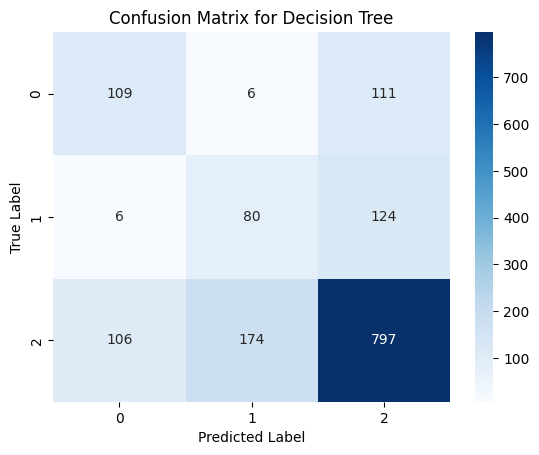

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.81      0.48      0.61       226
           1       0.58      0.21      0.31       210
           2       0.78      0.95      0.86      1077

    accuracy                           0.78      1513
   macro avg       0.73      0.55      0.59      1513
weighted avg       0.76      0.78      0.75      1513



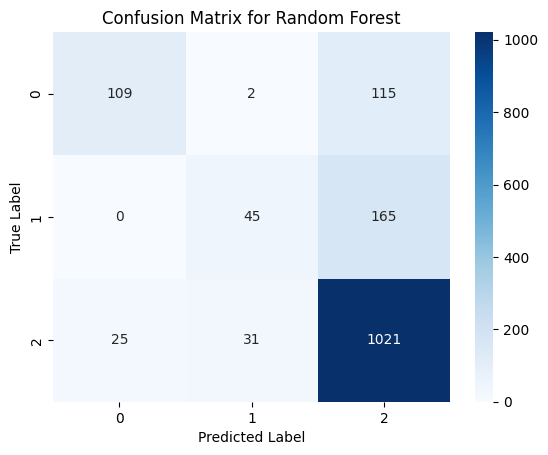

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.46      0.37      0.41       226
           1       0.20      0.84      0.32       210
           2       0.77      0.33      0.46      1077

    accuracy                           0.40      1513
   macro avg       0.48      0.51      0.40      1513
weighted avg       0.65      0.40      0.43      1513



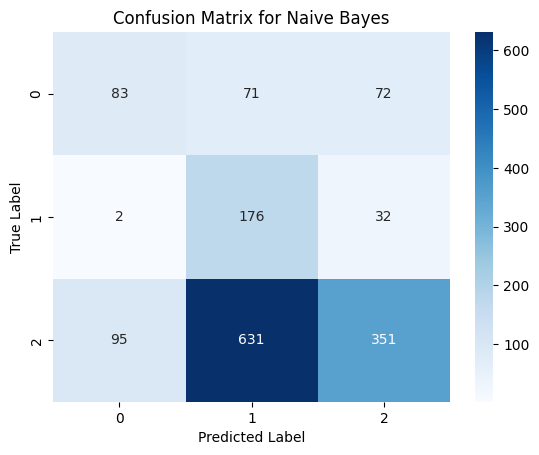

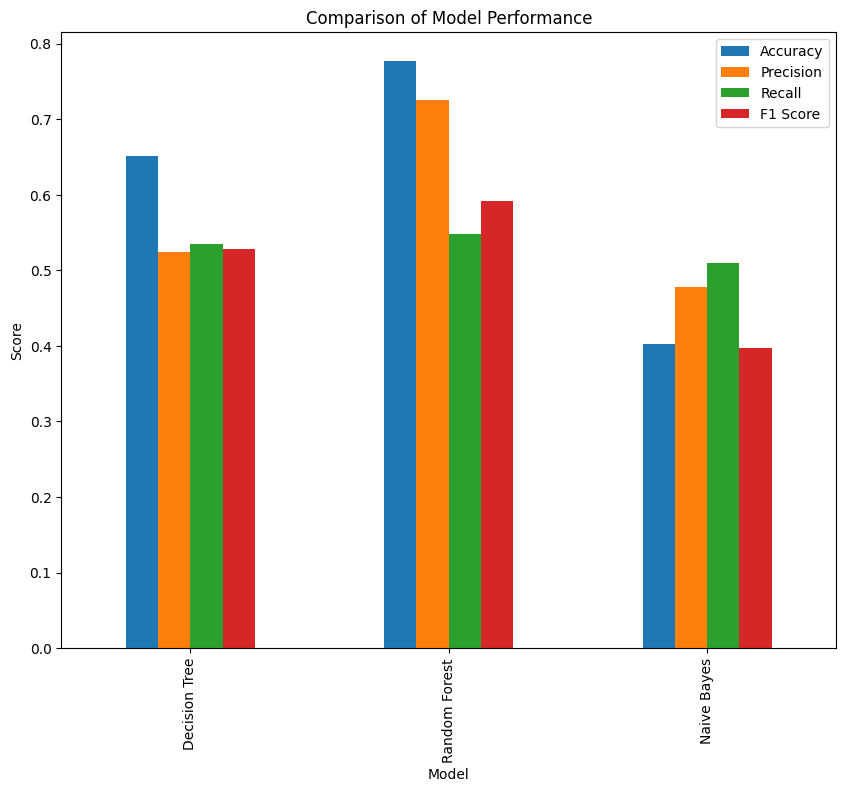

In [57]:

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate models
models = {'Decision Tree': decision_tree_model, 'Random Forest': random_forest_model, 'Naive Bayes': naive_bayes_model}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy, cr['macro avg']['precision'], cr['macro avg']['recall'], cr['macro avg']['f1-score']))
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(cm, label_encoder.classes_, name)

# Comparing model performance
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10, 8))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.show()

### 4.3 Model Interpretation
The results from the Decision Tree, Random Forest, and Naive Bayes models provide insightful contrasts in model performance, highlighting the trade-offs between precision, recall, and overall accuracy. The performance metrics provide understanding of how well each model meets the project objectives of predicting IMDb ratings classified into three categories: Low, Medium, and High.

**Decision Tree Model:**
- **Performance:** Achieved an accuracy of 65.17%. It shows a balanced performance across precision and recall for classifying 'Low' and 'Medium' ratings but performs better on 'High' ratings in terms of recall.
- **Interpretation:** The Decision Tree model exhibits some degree of overfitting to the 'High' rating class, as indicated by its better performance in this category. This could be due to the larger proportion of 'High' rating samples in the training data. It struggles more with 'Medium' ratings, possibly due to the boundaries between 'Medium' and other classes being less clear.

**Random Forest Model:**
- **Performance:** This model shows the highest accuracy at 77.66%, with particularly strong performance in classifying 'High' ratings (0.95 recall and 0.78 precision).
- **Interpretation:** As an ensemble method, the Random Forest improves on the Decision Tree by reducing variance and avoiding overfitting, leading to higher overall accuracy and better handling of the imbalanced class distribution. However, it still shows limited effectiveness in precisely identifying 'Medium' ratings, reflecting possibly complex, overlapping feature spaces that are typical for such intermediary classes.

**Naive Bayes Model:**
- **Performance:** Exhibited the lowest accuracy of 40.32%. Despite its high recall for 'Medium' ratings, its precision is very low, indicating a high rate of false positives.
- **Interpretation:** The Naive Bayes model's probabilistic nature leads it to perform well in terms of recall for the 'Medium' category due to its ability to handle overlapping features through probability estimates. However, its assumption of feature independence does not hold well in this context, leading to significant misclassifications, especially for 'High' ratings.

**Overall Insights:**
- The Random Forest model stands out as the most robust and accurate model for this task, balancing the trade-offs between recall and precision effectively across all classes, especially in handling the majority class ('High' ratings).
- The significant variability in model performance across different metrics (Accuracy, Precision, Recall, F1 Score) highlights the challenges of working with imbalanced data and the importance of choosing the right model and tuning it to align with specific project objectives.

**Recommendations:**
- **Further Tuning:** Consider further hyperparameter tuning and possibly employing techniques like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance, which could help improve the recall and precision for underperforming classes in all models, especially Random Forest and Decision Tree.
- **Feature Engineering:** Investigate more detailed feature engineering and inclusion of interaction terms that might help in better differentiating the 'Medium' class from 'Low' and 'High'.
- **Ensemble Learning:** Given the strengths shown by Random Forest, exploring other ensemble techniques like Gradient Boosting or AdaBoost might yield even better results by reducing bias and variance further.



## 5. Results and Discussion

### 5.1 Key Findings
1. **Model Performance:** The Random Forest model demonstrated the highest accuracy (77.66%) and proved effective in classifying the 'High' IMDb ratings, showcasing its robustness against overfitting and its ability to handle complex patterns in the data.
2. **Feature Importance:** Insights from the model suggest that certain features, particularly related to the popularity metrics like the number of reviews and votes, significantly influence the prediction of IMDb scores.
3. **Class Imbalance:** There was a notable challenge in accurately predicting the 'Medium' rating class across all models, likely due to the overlap of characteristics between classes and the imbalance in class distribution.

### 5.2 Implications and Recommendations
- **Model Optimization:** While Random Forest performed well, there is room for optimization through hyperparameter tuning and advanced ensemble techniques to further enhance precision and recall, especially for underrepresented classes.
- **Balancing Dataset:** Employ techniques like SMOTE for oversampling the minority classes or strategically undersampling the majority class to balance the dataset, which could improve model performance across less frequent categories.
- **Feature Engineering:** Further investigation into feature engineering, such as polynomial features or interactions between existing features, could provide deeper insights and improve model accuracy.

## 6. Operationalization

### 6.1 Methodology Adoption
- **Integration with Existing Systems:** The predictive models can be integrated into film production and distribution platforms to provide real-time predictions on potential IMDb scores based on pre-release data.
- **Continuous Learning:** Implement a system for models to update their learning based on new movie releases and user ratings to keep the predictions relevant and accurate over time.

### 6.2 Challenges in Implementation
- **Data Privacy:** Ensure compliance with data privacy regulations when collecting and processing user-generated content and reviews.
- **Scalability:** Managing the scalability of the model as data volume grows can be challenging. Using cloud-based solutions with auto-scaling capabilities can address this issue.
- **Model Drift:** As user preferences and industry standards evolve, the model may suffer from drift. Regular model retraining and validation against recent data are necessary to maintain its accuracy and relevance.

## 7. Conclusion
This project successfully developed a predictive model for IMDb ratings using Machine Learning techniques, with the Random Forest model providing the most reliable performance. The findings highlight the impact of user engagement metrics on movie ratings and underscore the importance of sophisticated model training techniques to address class imbalance. The methodology developed offers a scalable solution for anticipating movie ratings, which can assist producers and marketers in strategizing releases and promotional activities.

**Future Work:**
- Exploring more granular user demographic data to enhance prediction accuracy.
- Extending the model to predict other metrics of success such as box office performance.
- Integrating real-time data feeds to refine predictions as movies are being released and reviewed.